# Proyek Analisis Data: Nama dataset
- Nama: Hendry Wijaya
- Email: hendrywijaya628@gmail.com
- Id Dicoding:

importing pandas library

## Menentukan Pertanyaan Bisnis

- Performa Seller atau Merchant berdasarkan penilaian customer secara keseluruhan?
- Kategori produk apa yang paling favorit dan kurang peminat?
- Bagaimana Penilaian Customer selama berbelanja dalam beberapa bulan terakhir?
- Metode pembayaran transaksi yang paling sering digunakan oleh Pelanggan?
- Bagaimana Demografi berdasarkan Domisili dari masing-masing Pelanggan dan Penjual?
- Berapa Durasi Pemesanan yang diperlukan berdasarkan Negara bagian dan Kota?
- Kapan transaksi terakhir kali yang dilakukan pelanggan?
- Berapa kali pelanggan melakukan pembelian selama beberapa bulan terakhir?
- Berapa uang yang dihasilkan pelanggan dalam beberapa bulan terakhir?
- Bagaimana Penilaian terhadap pelanggan berdasarkan hasil Segmentasi?
- Bagaimana Perilaku masing-masing pelanggan berdasarkan Segmentasi?

## Menyaipkan semua library yang dibuthkan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Data Wrangling

### Gathering Data
pada tahap ini melakukan pengumpulan dan import semua data yang dibutuhkan, seperti pada kriteria sebelumnya data yang dipilih adalah **E-Commerce Public Dataset** yang berasal dari **OLIST** yang merupakan platform E-commerce dari Brazil.


Data E-commerce Olist terdiri dari
- `olist_customers_dataset.csv` alias `customers_df`, data para pengguna olist sebagai pelanggan atau pembeli produk
- `olist_products_dataset.csv` alias `product_df`, data produk yang dijual pada platform katalog olist
- `olist_orders_dataset.csv` alias `order_df`, data pesanan pembelian
- `olist_order_items_dataset.csv` alias `item_df`, data pesanan produk
- `olist_order_payments_dataset.csv` alias `payment_df`, data transaksi pembayaran dari pemesanan pembelian oleh pelanggan
- `olist_sellers_dataset.csv` alias `seller_df`, data para penjual sebagai pengguna platform olist
- `olist_order_reviews_dataset.csv` alias `review_df`, data ulasan dari pemesanan pelanggan dalam bahasa brasil dengan ratingnya
- `olist_geolocation_dataset.csv` alias `geolocation_df`, data geolokasi dari domisili berdasarkan id zip
- `product_category_name_translation.csv` alias `translation`, terjemahan nama kategori produk dalam bahasa inggris
- `brazil_state_isocode.csv` alias `state_iso`, data yang berisi kode iso yang mewakili negara bagian - negara bagian dari brasil


In [ ]:
# # olist_customer_dataset.csv ---- customer_df
# customer_df = pd.read_csv('olist_customers_dataset.csv')

# # olist_products_dataset.csv ---- product_df
# product_df = pd.read_csv('olist_products_dataset.csv')

# # olist_orders_dataset.csv ---- order_df
# order_df = pd.read_csv('olist_orders_dataset.csv')

# # olist_orders_item_dataset.csv ---- item_df
# item_df = pd.read_csv('olist_order_items_dataset.csv')

# # olist_orders_payments_dataset.csv --- payment_df
# payment_df = pd.read_csv('olist_order_payments_dataset.csv')

# # product_category_name_translation.csv --- translation
# translation = pd.read_csv('product_category_name_translation.csv')

# # brazil_state_isocode.csv --- state_iso
# state_iso = pd.read_csv('brazil_state_isocode.csv')

# # olist_sellers_dataset.csv --- seller_df
# seller_df = pd.read_csv('olist_sellers_dataset.csv')

# # olist_order_reviews_dataset.csv --- review_df
# review_df = pd.read_csv('olist_order_reviews_dataset.csv')

# # olist_geolocation_dataset.csv --- geolocation_df
# geolocation_df = pd.read_csv('olist_geolocation_dataset.csv')
# geolocation_2 = geolocation_df.copy()

menggabungkan semua data dengan urutan penggabungan sebagai berikut
- diawali dengan menggbaungkan tabel geolokasi dengan tabel seller masing-masing menggunakan kolom zip code, namun untuk zip code di seller diubah dulu namanya agar disesuaikan. tujuannya untuk mendapatkan data lattitude dan longitude pada domisili kota dari para penjual, tidak lupa juga menghapus data duplicate karena ada banyak data duplikat setelah melakukan penggabungan
- kemudian menggabungkan tabel seller yang baru dengan tabel state code, untuk mengambil nama negara bagian berdasarkan kode negara bagian dari tabel seller dan tidak lupa mengganti nama state jadi seller state
- menggabungkan tabel seller dengan tabel item menggunakan kolom seller_id sebagai penghubung secara LEFT JOIN karena hanya mengambil data sellernya saja, kemudian dari tabel seller hanya memilih beberapa kolom yaitu 'order_id', 'order_item_id', 'product_id', 'seller_id', 'seller_city', 'seller_state', 'seller_geolat', 'seller_geolong', 'shipping_limit_date', 'price', 'freight_value'
- menggabungkan tabel geolokasi dengan tabel customer menggunakan kolom zip code, namun untuk zip code di customer diubah dulu namanya agar disesuaikan. tujuannya untuk mendapatkan data lattitude dan longitude pada domisili kota dari para pembeli, tidak lupa juga menghapus data duplicate karena ada banyak data duplikat setelah melakukan penggabungan
- kemudian menggabungkan tabel customer yang baru dengan tabel state code, untuk mengambil nama negara bagian berdasarkan kode negara bagian dari tabel customer dan tidak lupa mengganti nama state menjadi customer state
- menggabungkan tabel customer dengan tabel order menggunakan kolom customer_id secara INNER JOIN, untuk mengambil data pesanan yang jumlahnya lebih sedikit dari data customer dan menjadikannya kedua tabel baru yang berisi data pembeli dengan pesanan pembeliannya. hasil aakhir berupa tabel order cutomer atau order cust.
- menggabungkan tabel gabungan order dan customer dengan tabel review menggunakan kolom order_id, untuk mengambil data review customer dengan ratingnya dari tabel review. hasil akhir berupa tabel order review.
- meleburkan tabel product category translation dengan tabel produk menggunakan kolom product category name sebagai penghubung. untuk mengambil terjemahan dari nama kategori produk yang berbahasa inggris, dibanding nama kategori produk yang berbahasa brazil dari data asli pada tabel produk.
- menggabungkan tabel menggabungkan tabel item dengan tabel produk dengan teknik LEFT JOIN dan kolom product_id sebagai penghubung, untuk melebur data dari tabel produk ke data item karena data produk barisnya lebih sedikit daripada tabel item. hasil akhir berupa tabel produk item atau item_prod.
- menggabungkan tabel order review yang merupakan gabungan data customer, order dengan review pada data item produk yang merupakan gabungan produk dan item. teknik penggabungan dilakukan secara left dimana item produk merupakan tabel kiri karena jumlah tabel item produk yang lebih banyak daripada order review. hasil penggabungan berupa item order
- terakhir menggabungkan tabel item order dengan tabel data pembayaran, sehingga menjadi satu kesatuan tabel baru yang bernama customer order transaction.
tabel customer order transaction merupakan hasil akhir sebagai data yang dipake untuk proses **data assessment** dan **data cleaning**, hingga tahap **exploratory data analysis**

In [ ]:
# # geolocations (zip_code) -> seller (zip_code)
# seller_df.rename(columns={'seller_zip_code_prefix':'geolocation_zip_code_prefix'}, inplace=True)
# seller_df = seller_df.merge(geolocation_df, on='geolocation_zip_code_prefix', how='left')
# seller_df.drop(columns=['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state'], inplace=True)
# seller_df.rename(columns={'geolocation_lat':'seller_geolat', 'geolocation_lng':'seller_geolong'}, inplace=True)
# seller_df.drop_duplicates('seller_id',keep='last', inplace=True)

# # state_iso (state_code) -> seller (seller_state)
# seller_df = seller_df.merge(state_iso, left_on='seller_state', right_on='state_code')
# seller_df.drop(columns=['seller_state', 'state_code'], inplace=True)
# seller_df.rename(columns={'state_name':'seller_state'}, inplace=True)

# # seller (seller_id) -> order_items (seller_id)
# item_df = item_df.merge(seller_df, on = 'seller_id', how='left')
# item_df = item_df[['order_id', 'order_item_id', 'product_id', 'seller_id', 'seller_city', 'seller_state', 'seller_geolat', 'seller_geolong',
#                    'shipping_limit_date', 'price', 'freight_value']]

# # geolocations (zip_code) -> customers (zip_code)
# customer_df.rename(columns={'customer_zip_code_prefix':'geolocation_zip_code_prefix'}, inplace=True)
# customer_df = customer_df.merge(geolocation_df, on='geolocation_zip_code_prefix', how='left')
# customer_df.drop(columns=['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state'], inplace=True)
# customer_df.rename(columns={'geolocation_lat':'customer_geolat', 'geolocation_lng':'customer_geolong'}, inplace=True)
# customer_df.drop_duplicates('customer_id',keep='last', inplace=True)

# # state_iso (customer_state) -> customers (customer_state)
# # 'state_iso' digabung ke 'customer_df' pake "customer_state" dan "state_code", nama tetep sama
# customer_df = customer_df.merge(state_iso, left_on='customer_state', right_on='state_code')
# customer_df.drop(columns=['customer_state', 'state_code'], inplace=True)
# customer_df.rename(columns={'state_name':'customer_state'}, inplace=True)

# # customers (customer_id) -> orders (customer_id)
# # 'customer_df' digabung ke 'order_df' pake "customer_id" jadi 'order_customer' (sisa order id)
# order_cust = order_df.merge(customer_df, on='customer_id', how='inner')

# # order_review (order_id) -> orders (order_id)
# order_review = order_cust.merge(review_df, left_on = 'order_id', right_on = 'order_id')

# # translation (product_category_name) -> products product_category_name (product_category_name)
# # 'translation' digabung ke 'product_df' pake "product_category_name_english" jadi 'product_df'
# product_df = product_df.merge(translation, on='product_category_name', how='left')

# # products (order_id) -> order_items (order_id) [item_products]
# # 'product_df' digabung ke 'item_df' pake "product_id" jadi 'item_product' (sisa order id)
# item_prod = item_df.merge(product_df, on='product_id', how='left')

# # item_products (order_id) -> order_customer (order_id)
# # 'item_product' digabung ke 'order_customer' pake "order_id" jadi 'item_order'
# item_order =  item_prod.merge(order_review, on='order_id', how='left')

# # payments (order_id) -> item_order (order_id)
# # 'payment_df' digabung ke 'item_order' pake "order_id" jadi 'customer_transaction_df'
# customer_order_transaction = item_order.merge(payment_df, on='order_id', how='outer')

mengurutkan data sebelum diexpor sebagai data baru
- mengurutkan kolom-kolom berdasarkan pengertian dari value kolom tersebut, mulai dari kolom id, kolom untuk penjual, produk, pemesanan, customer, durasi, data transaksi
- hasil akhir di expor ke file csv sebagai data baru, untuk langsung di import pada proses berikutnya. agar data yang sudah diproses langsung dibersihkan dan dianalisis, sehingga mempercepat proses tanpa harus mengulangi proses yang pertama.

In [ ]:
# customer_order_transaction = customer_order_transaction[['order_id', 'order_item_id', 'product_id', 'customer_id', 'customer_unique_id', 'seller_id', 'seller_city',
#   'seller_state', 'seller_geolat', 'seller_geolong','product_category_name', 'product_category_name_english', 'product_name_lenght',
#   'product_description_lenght', 'product_photos_qty', 'product_weight_g','product_length_cm', 'product_height_cm', 'product_width_cm', 'order_status',
#   'shipping_limit_date', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date',
#   'customer_city', 'customer_geolat', 'customer_geolong', 'customer_state', 'review_id', 'review_score', 'review_comment_title', 'review_comment_message',
#   'review_creation_date', 'review_answer_timestamp', 'payment_sequential', 'payment_type', 'payment_installments', 'price', 'freight_value', 'payment_value']]

# customer_order_transaction.to_csv('customer_order_transaction_dataset.csv',index=False)

### Assessing Data
pada tahap ini melakukan pengecekan kualitas pada tabel data, seperti emmeriksa jumlah data yang hilang atau **missing value**, data berulang atau **duplicate value**, kemudian melihat data berdasarkan deskriptif statistik.

In [3]:
# baca data baru customer_order_transaction dari hasil penggabungan sebelumnya
customer_order_transaction = pd.read_csv('customer_order_transaction_dataset.csv')
customer_order_transaction.head()

,order_id,order_item_id,product_id,customer_id,customer_unique_id,seller_id,seller_city,seller_state,seller_geolat,seller_geolong,...,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,price,freight_value,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1.0,4244733e06e7ecb4970a6e2683c13e61,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,48436dade18ac8b2bce089ec2a041202,volta redonda,São Paulo,-22.499325,-44.125997,...,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,1.0,credit_card,2.0,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,1.0,e5f2d52b802189ee658865ca93d83a8f,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,dd7ddc04e1b6c2c614352b383efe2d36,sao paulo,São Paulo,-23.563590,-46.515620,...,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13,1.0,credit_card,3.0,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,1.0,c777355d18b72b67abbeef9df44fd0fd,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,5b51032eddd242adc84c38acab88f23d,borda da mata,Minas Gerais,-22.258834,-46.147881,...,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31,1.0,credit_card,5.0,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,1.0,7634da152a4610f1595efa32f14722fc,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,9d7a1d34a5052409006425275ba1c2b4,franca,São Paulo,-20.555548,-47.401869,...,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01,1.0,credit_card,2.0,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1.0,ac6c3623068f30de03045865e4e10089,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,df560393f3a51e74553ab94004ba5c87,loanda,Paraná,-22.923110,-53.138447,...,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59,1.0,credit_card,3.0,199.90,18.14,218.04


Kolom yang dihapus : `review_comment_title`, `review_comment_message`, `product_category_name`, `product_photos_qty`, `product_description_lenght`, `product_name_lenght`, `product_width_cm`, `product_height_cm`, `product_length_cm`, `product_weight_g`

In [4]:
customer_order_transaction.drop(columns=['review_comment_title', 'review_comment_message', 'product_category_name',
                                         'product_photos_qty', 'product_description_lenght', 'product_name_lenght',
                       'product_width_cm', 'product_height_cm', 'product_length_cm', 'product_weight_g'], inplace=True)

Nama Kolom dataset
- order_id, unique identifier to each order
- customer_id, unique identifier for each customer, which available to connect to another table
- customer_unique_id, identifier unique for each customer
- order_status, order status such as delivered when order commit delivered and cancelled when the order cancelled
- order_purchase_timestamp , display the timestamp of purchase made by customer
- order_delivered_carrier_date, display the order post when it prepared and processed by logistic partner
- order_delivered_customer_date, display the actual order's delivery date to customer related
- order_estimated_delivery_date, display date estimation of product delivered to customer when purchase the product
- product_id, identifier unique to each product unit purchased
- product_category_name, product category name in brazillian
- product_category_name_english, product category name in english
- order_approved_at, display timestamp when order approved by the seller
- shipping_limit_date, display the limit date of seller for processing the order to be proceed to the logistic partner
- price, price of product
- freight_value, product delivery fee that borne by buyers
- payment_method, customer payment method preferences
- boleto, is a payment method which regulated by brazilian central bank that using voucher
- payment_sequential, customer who possibly order and pay more than payment method, then there are the sequences of payment
- payment_value, amount of money paid by customer
- customer_city, city where customer live
- customer_state, federal state where customer live
- customer_geolat, geographical lattitude where customer live
- customer_geolong, geographical longitude where customer live
- seller_id, unique identifier of merchant or seller
- seller_city, city where seller or merchant live
- seller_state, federal state where seller or merchant live
- seller_geolat, geographical lattitude where seller or merchant live
- seller_geolong, geographical longitude where seller or merchant live
- review_id, unique identifier of review              
- review_score, review score that given by customers
- review_comment_title, title of review comment
- review_comment_message, message of review comment
- review_creation_date, date when the review comment created
- review_answer_timestamp, date when the review comment answered by the merchant

data ini terdiri dari 32 kolom dan 119140 baris, termasuk data yang kotor

In [5]:
# liat jumlah baris dan kolom
print(customer_order_transaction.shape)
# liat informasi data terkait tipe data, nama-nama kolom dan baris yang tidak kosong
print(customer_order_transaction.info())

(119140, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119140 entries, 0 to 119139
Data columns (total 32 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119140 non-null  object 
 1   order_item_id                  118310 non-null  float64
 2   product_id                     118310 non-null  object 
 3   customer_id                    117332 non-null  object 
 4   customer_unique_id             117332 non-null  object 
 5   seller_id                      118310 non-null  object 
 6   seller_city                    118310 non-null  object 
 7   seller_state                   118310 non-null  object 
 8   seller_geolat                  118045 non-null  float64
 9   seller_geolong                 118045 non-null  float64
 10  product_category_name_english  116576 non-null  object 
 11  order_status                   117332 non-null  object 
 12  shipping_limit_da

memeriksa kalau data ada baris yang hilang atau **missing** atau **null value**

In [6]:
# memeriksa jumlah baris yang kosong per kolom
print(customer_order_transaction.isnull().sum().sort_values(ascending=False))

order_delivered_customer_date    4279
order_delivered_carrier_date     3043
product_category_name_english    2564
customer_geolong                 2124
customer_geolat                  2124
order_approved_at                1823
order_estimated_delivery_date    1808
customer_state                   1808
order_status                     1808
review_answer_timestamp          1808
order_purchase_timestamp         1808
review_creation_date             1808
customer_unique_id               1808
review_score                     1808
review_id                        1808
customer_city                    1808
customer_id                      1808
seller_geolat                    1095
seller_geolong                   1095
freight_value                     830
seller_city                       830
product_id                        830
seller_state                      830
order_item_id                     830
shipping_limit_date               830
seller_id                         830
price       

memeriksa kalau data ada baris yang duplikat atau **duplicated value**

In [ ]:
# memeriksa jumlah baris yang duplikat per kolom
customer_order_transaction[customer_order_transaction.duplicated()].count()

order_id                         0
order_item_id                    0
product_id                       0
customer_id                      0
customer_unique_id               0
seller_id                        0
seller_city                      0
seller_state                     0
seller_geolat                    0
seller_geolong                   0
product_category_name_english    0
order_status                     0
shipping_limit_date              0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_city                    0
customer_geolat                  0
customer_geolong                 0
customer_state                   0
review_id                        0
review_score                     0
review_creation_date             0
review_answer_timestamp          0
payment_sequential               0
payment_type                     0
payment_installments

melihat deskriptif statistik dari variabel pada data numerik secara defaultnya

In [ ]:
customer_order_transaction.describe()

,order_item_id,seller_geolat,seller_geolong,customer_geolat,customer_geolong,review_score,payment_sequential,payment_installments,price,freight_value,payment_value
count,118310.000000,118045.000000,118045.000000,117016.000000,117016.000000,117332.000000,119137.00000,119137.000000,118310.000000,118310.000000,119137.000000
mean,1.196543,-22.796103,-47.239290,-21.236318,-46.199184,4.031390,1.09474,2.941219,120.646603,20.032387,172.737558
std,0.699489,2.690803,2.340290,5.571584,4.053751,1.387994,0.73015,2.777796,184.109691,15.836850,267.778929
min,1.000000,-32.095725,-67.813148,-33.691550,-72.664409,1.000000,1.00000,0.000000,0.850000,0.000000,0.000000
25%,1.000000,-23.606158,-48.838906,-23.590900,-48.105604,4.000000,1.00000,1.000000,39.900000,13.080000,60.850000
50%,1.000000,-23.419025,-46.750102,-22.928531,-46.631956,5.000000,1.00000,2.000000,74.900000,16.280000,108.160000
75%,1.000000,-21.754867,-46.521292,-20.190978,-43.632322,5.000000,1.00000,4.000000,134.900000,21.180000,189.240000
max,21.000000,-2.505689,-34.853742,45.065933,9.341528,5.000000,29.00000,24.000000,6735.000000,409.680000,13664.080000


juga melihat deskriptif statistik dari variabel pada data kategorikal, menggunakan parameter `include` dan argument `object` di dalam kurung siku

In [ ]:
# statistical descriptive for object or category variables
customer_order_transaction.describe(include=['object'])

,order_id,product_id,customer_id,customer_unique_id,seller_id,seller_city,seller_state,product_category_name_english,order_status,shipping_limit_date,...,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_city,customer_state,review_id,review_creation_date,review_answer_timestamp,payment_type
count,119140,118310,117332,117332,118310,118310,118310,116576,117332,118310,...,117317,116097,114861,117332,117332,117332,117332,117332,117332,119137
unique,99441,32951,97917,94721,3095,611,23,71,7,93318,...,89534,80450,95022,450,4108,27,97709,633,97547,5
top,895ab968e7bb0d5659d16cd74cd1650c,aca2eb7d00ea1a7b8ebd4e68314663af,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fbb006bcb877c3,4a3ca9315b744ce9f8e9374361493884,sao paulo,São Paulo,bed_bath_table,delivered,2017-08-14 20:43:31,...,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-12-20 00:00:00,sao paulo,São Paulo,eef5dbca8d37dfce6db7d7b16dd0525e,2017-12-19 00:00:00,2017-08-17 22:17:55,credit_card
freq,63,536,63,75,2155,29293,84377,11988,114862,63,...,63,63,63,652,18582,49530,63,542,63,87775


### Cleaning Data
membersihkan data dilakukan dengan menghapus data null atau missing values, karena data null values tersebut berasal dari akibat penggabungan data dengan teknik outer join
- menggabungkan data dengan merge outer join, baris data yang kosong jika ada identifiernya maka ikut tergabung
- maka ada banyak null values atau data yang hilang karena baris yang tidak lengkap ketika digabungkan ke data utama

pembersihan data dengan menghapusnya, karena valuenya tidak valid

In [7]:
# hapus semua baris kolom yang terdapat nilai yan hilang
customer_order_transaction.dropna(axis=0, inplace=True)

# periksa kembali semua baris dan kolom setelah null value dihapus
print('jumlah baris dan kolom setelah null value removal :', customer_order_transaction.shape)
customer_order_transaction.isnull().sum()

jumlah baris dan kolom setelah null value removal : (112638, 32)


order_id                         0
order_item_id                    0
product_id                       0
customer_id                      0
customer_unique_id               0
seller_id                        0
seller_city                      0
seller_state                     0
seller_geolat                    0
seller_geolong                   0
product_category_name_english    0
order_status                     0
shipping_limit_date              0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_city                    0
customer_geolat                  0
customer_geolong                 0
customer_state                   0
review_id                        0
review_score                     0
review_creation_date             0
review_answer_timestamp          0
payment_sequential               0
payment_type                     0
payment_installments

## Exploratory Data Analysis (EDA)
Transformasi feature kolom
- transformasi kolom berdasarkan tipe data yaitu  `order_item` dan `payment_sequential` dari `float` ke `int`
- transformasi kolom berdasarkan tipe data yang berisi tanggal pembelian dan pembayaran hingga pemesanan diantar bertipe data `datetime`

In [8]:
# order_item_id, payment_sequential menjadi int
customer_order_transaction['payment_sequential'] = customer_order_transaction['payment_sequential'].astype(int)
# mengubah kolom shipping limit, order purchase time, order delivered menjadi datetime
customer_order_transaction[['shipping_limit_date','order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date',
          'order_estimated_delivery_date','review_creation_date','review_answer_timestamp']] = customer_order_transaction[['shipping_limit_date',
          'order_purchase_timestamp', 'order_approved_at','order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date',
          'review_creation_date','review_answer_timestamp']].apply(pd.to_datetime)

menghapus kolom yang tidak perlukan :    
```
'order_item_id','customer_id','payment_installment'
```
mengganti nama kolom
- mengganti nama kolom `product_category_name_english` menjadi `product_category`
- `customer_unique_id` menjadi `customer_id`

In [9]:
customer_transaction = customer_order_transaction.drop(columns=['order_item_id','customer_id','payment_installments'])

# mengubah format nama kolom product_category_name_english dan customer_unique_id
customer_transaction.rename(columns={'product_category_name_english':'product_category', 'customer_unique_id':'customer_id'}, inplace=True)

membuat feature column baru dari hasil penjumlahan
- jumlah uang yang dibayar oleh customer, `total amount = price + freight value`
- kembalian uang yang diterima oleh customer dari pembayaran, `payment change = payment value - total amount`

In [10]:
customer_transaction['total_amount'] = customer_transaction['price'] + customer_transaction['freight_value']
# payment_change = payment_value total_amount dan menggunakan round untuk membulatkan desimal, dan abs() untuk absolute minus
customer_transaction['payment_change'] = ((customer_transaction['payment_value'] - customer_transaction['total_amount']).round(decimals=2)).abs()

membuat kolom baru dari hasil perhitungan timestamp
- durasi jam berlangsung ketika pesanan dikonfirmasi setelah customer membayar, `approval_hourly = order_approved_at - order_purchase_timestamp`
- durasi jam yang berlangsung ketika pesanan disiapkan setelah diterima, `packaging_hourly = shipping_limit_date - order_approved_at`
- durasi jam yang berlangsung ketika pesanan diantar ke customer, `delivery_hourly = order_delivered_customer_date - order_delivered_carrier_date`
- durasi jam yang berlangsung oleh seller ketika membalas ulasan atau komentar dari customer, `response_time = review_creation_date - review_answer_timestamp`

In [32]:
# .dt.total_seconds() dasarnya untuk satuan detik, untuk menit tinggal dibagi 60 dan jam maka dibagi 60 lagi
# approval_duration = order_approved_at - order_purchase_timestamp (in minutes)
customer_transaction['approval_hourly'] = (customer_transaction['order_approved_at'] - customer_transaction['order_purchase_timestamp']).dt.total_seconds() / (60*60)
customer_transaction['approval_hourly'] = customer_transaction['approval_hourly'].round(decimals=2)
# shipping_duration = shipping_limit_date - order_approved_at (in hourly)
customer_transaction['packaging_hourly'] = (customer_transaction['shipping_limit_date'] - customer_transaction['order_approved_at']).dt.total_seconds() / (60*60)
customer_transaction['packaging_hourly'] = customer_transaction['packaging_hourly'].round(decimals=2)
# delivery_duration = order_delivered_customer_date - order_delivered_carrier_date (in hourly)
customer_transaction['deliver_hourly']= (customer_transaction['order_delivered_customer_date'] - customer_transaction['order_delivered_carrier_date']).dt.total_seconds()/(60*60)
customer_transaction['deliver_hourly'] = customer_transaction['deliver_hourly'].round(decimals=2)
# response_time = review_creation_date - review_answer_timestamp
customer_transaction['response_time']= (customer_transaction['review_answer_timestamp'] - customer_transaction['review_creation_date']).dt.total_seconds()/(60*60)
customer_transaction['response_time'] = customer_transaction['response_time'].round(decimals=2)

menghapus kolom yang tidak diperlukan dan mengurutkan urutan kolom baru

In [34]:
# menghapus kolom yang tidak diperlukan, kolom tanggal
custrans_df = customer_transaction.drop(columns=['shipping_limit_date', 'order_purchase_timestamp' , 'order_delivered_carrier_date',
                                                 'payment_sequential', 'order_estimated_delivery_date'])

# mengurutkan ulang kolom antara kolom lama dengan kolom penambahan
custrans_df = custrans_df[['order_id', 'product_id', 'customer_id', 'seller_id','product_category','order_approved_at','order_delivered_customer_date' , 'order_status',
                           'approval_hourly', 'packaging_hourly', 'deliver_hourly', 'customer_city', 'customer_state','customer_geolat','customer_geolong','seller_city',
                           'seller_state','seller_geolat','seller_geolong','review_id','review_score','review_creation_date','review_answer_timestamp','response_time',
                           'payment_type', 'price', 'freight_value', 'total_amount', 'payment_value', 'payment_change']]

memeriksa informasi dataset setelah modifikasi dari hasil transformasi, kolom baru dan hasil kolom yang diurutkan

In [35]:
print(custrans_df.info())
display(custrans_df.describe())
display(custrans_df.describe(include=[object]))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112638 entries, 0 to 118309
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112638 non-null  object        
 1   product_id                     112638 non-null  object        
 2   customer_id                    112638 non-null  object        
 3   seller_id                      112638 non-null  object        
 4   product_category               112638 non-null  object        
 5   order_approved_at              112638 non-null  datetime64[ns]
 6   order_delivered_customer_date  112638 non-null  datetime64[ns]
 7   order_status                   112638 non-null  object        
 8   approval_hourly                112638 non-null  float64       
 9   packaging_hourly               112638 non-null  float64       
 10  deliver_hourly                 112638 non-null  float64       
 11  

,approval_hourly,packaging_hourly,deliver_hourly,customer_geolat,customer_geolong,seller_geolat,seller_geolong,review_score,response_time,price,freight_value,total_amount,payment_value,payment_change
count,112638.00000,112638.000000,112638.000000,112638.000000,112638.000000,112638.000000,112638.000000,112638.000000,112638.000000,112638.000000,112638.000000,112638.000000,112638.000000,112638.000000
mean,10.43836,148.162510,219.781921,-21.246464,-46.206867,-22.794508,-47.250711,4.082281,75.687871,119.890695,19.994579,139.885273,171.624030,42.937496
std,20.95662,129.884178,205.239801,5.560311,4.046757,2.703816,2.345701,1.346116,235.098438,181.346106,15.724898,188.384823,264.617854,175.203040
min,0.00000,-153.610000,-386.310000,-33.691550,-72.664409,-32.095725,-63.895935,1.000000,2.140000,0.850000,0.000000,6.080000,0.000000,0.000000
25%,0.22000,96.000000,97.400000,-23.592022,-48.111297,-23.608911,-48.838906,4.000000,24.320000,39.900000,13.072500,55.240000,60.772500,0.000000
50%,0.35000,144.000000,169.320000,-22.928531,-46.632102,-23.418591,-46.750102,5.000000,40.530000,74.900000,16.310000,91.720000,107.900000,0.000000
75%,14.95750,144.000000,285.600000,-20.200242,-43.651610,-21.754867,-46.521292,5.000000,74.970000,133.000000,21.180000,157.300000,189.157500,22.140000
max,741.44000,25224.000000,4924.580000,42.184003,-4.947823,-2.505689,-34.853742,5.000000,12448.780000,6735.000000,409.680000,6929.310000,13664.080000,11956.070000


,order_id,product_id,customer_id,seller_id,product_category,order_status,customer_city,customer_state,seller_city,seller_state,review_id,payment_type
count,112638,112638,112638,112638,112638,112638,112638,112638,112638,112638,112638,112638
unique,94003,31371,91020,2900,71,2,4023,27,587,22,93828,4
top,895ab968e7bb0d5659d16cd74cd1650c,aca2eb7d00ea1a7b8ebd4e68314663af,9a736b248f67d166d2fbb006bcb877c3,4a3ca9315b744ce9f8e9374361493884,bed_bath_table,delivered,sao paulo,São Paulo,sao paulo,São Paulo,eef5dbca8d37dfce6db7d7b16dd0525e,credit_card
freq,63,524,75,2091,11657,112631,17829,47702,27997,80363,63,83098


Menambahkan 2 kolom baru yaitu
- `Review Rating` yang berisi '5 Stars', '4 Stars', '3 Stars', '2 Stars', '1 Stars', menggunakan teknik def apply function
- `Order Process Time` yang berisi total pemesanan dari jumlah `Approval Minutes`, `Packaging Hourly` dan `Delivery Hourly`
- untuk kolom `Approval Minutes` dibagi 60 dulu supaya sama menjadi satuan jam sama seperti kolom `Packaging Hourly` dan `Delivery Hourly`


In [43]:
def review_rating(row):
    row = float(row)
    review_stars = 0
    # if review_score = 5 then '5 stars'
    if row == 5:
       review_stars = 5.0
    # elif review_score > 4 and review_score < 5 then '4 stars'
    elif row >= 4.0:
       review_stars = 4
    # elif review_score > 3 and review_score < 4 then '3 stars'
    elif row >= 3.0:
       review_stars = 3
    # elif review_score > 2 and review_score < 3 then '2 stars'
    elif row >= 2.0:
       review_stars = 2
    # elif review_score > 1 and review_score < 2 then '1 stars'
    elif row >= 1.0:
       review_stars = 1
    else:
       review_stars = 0
    return review_stars

custrans_df['review_rating'] = custrans_df['review_score'].apply(review_rating)
# transform approval minutes into hour by deviding with 60,
custrans_df['order_process_time'] = custrans_df['approval_hourly'] + custrans_df['packaging_hourly'] + custrans_df['deliver_hourly']

# reorder all columns
custrans_df = custrans_df[['order_id', 'product_id', 'customer_id', 'seller_id','product_category', 'order_approved_at', 'order_delivered_customer_date',
                           'order_status', 'approval_hourly', 'packaging_hourly', 'deliver_hourly', 'order_process_time', 'customer_city', 'customer_state',
                           'customer_geolat', 'customer_geolong', 'seller_city', 'seller_state', 'seller_geolat', 'seller_geolong', 'review_id',
                           'review_score', 'review_rating', 'review_creation_date', 'review_answer_timestamp', 'response_time', 'payment_type', 'price',
                           'freight_value', 'total_amount', 'payment_value', 'payment_change']]

kalau datanya udah yakin, hasil akhirnya mengurutkan kembali dan memilih kolom yang benar-benar digunakan pada saat proses exploratory data analysis hingga explanatory visualization analysisnya sesuai dengan pertanyaan-pertanyaan bisnis yang dibuat

In [48]:
custrans_df[['review_answer_timestamp', 'review_creation_date', 'response_time']]

,review_answer_timestamp,review_creation_date,response_time
0,2017-09-22 10:57:03,2017-09-21,34.95
1,2017-05-15 11:34:13,2017-05-13,59.57
2,2018-01-23 16:06:31,2018-01-23,16.11
3,2018-08-15 16:39:01,2018-08-15,16.65
4,2017-03-03 10:54:59,2017-03-02,34.92
...,...,...,...
118305,2018-05-14 12:53:47,2018-05-11,84.90
118306,2018-07-25 09:25:29,2018-07-24,33.42
118307,2017-10-29 21:33:52,2017-10-29,21.56
118308,2017-08-18 12:24:05,2017-08-17,36.40


In [45]:
# custrans_df.head()
custrans_df.to_csv('cust_trans_dataset.csv',index=False)

### Explore ...
pada tahap ini melakukan eksplorasi pada dataset berdasarkan masing-masing kolom
- eksplorasi dilakukan dengan teknik groupby dan group by aggregate pada kolom numerik yang ingin digali berdasarkan kolom kategori yang ada
- eksplorasi ini untuk mencari temuan-temuan yang nantinya cocok dan bisa digunakan untuk menjawab pertanyaan bisnis
- temuan yang menarik untuk dibahas akan dijelaskan secara explanatory analysis

mengeksplorasi data status pesanan dengan rata-rata waktu masing-masing proses pemesanan, namun tidak ada temuan yang menarik karena durasi pemesanan dari pesanan yang dibatalkan dan diantarkan relatif

In [18]:
# group customer order status by approval_hourly, packaging_hourly, deliver_hourly
custrans_df.groupby(by=['order_status']).agg(average_approval=('approval_hourly', 'mean'), total_approval=('approval_hourly', 'sum'),
                                average_packaging=('packaging_hourly', 'mean'), total_packaging=('packaging_hourly', 'sum'),
                                average_deliver=('deliver_hourly', 'mean'), total_deliver=('deliver_hourly', 'sum')).reset_index().round(2)

,order_status,average_approval,total_approval,average_packaging,total_packaging,average_deliver,total_deliver
0,canceled,11.04,77.28,141.44,990.10,285.02,1995.11
1,delivered,10.44,1175678.72,148.16,16687738.69,219.78,24753800.96


pada temuan ini berdasarkan transaksi dari pesanan yang dibatalkan dan diantarkan, jika semua pesanan berhasil diantar maka realisasi dari pemasukan seller akan lebih besar

berdasarkan total dari pembayaran, bahwa pesanan yang dibatalkan menyajikan data transaksi yang jauh lebih sedikit

In [ ]:
# group order status by mean price, freight_value, total_amount
custrans_df.groupby(by=['order_status']).agg(average_amount=('total_amount', 'mean'), total_amount=('total_amount', 'sum'),
                                average_payment=('payment_value', 'mean'), total_payment=('payment_value', 'sum'),
                                average_change=('payment_change', 'mean'), total_change=('payment_change', 'sum')).reset_index().round(2)

,order_status,average_amount,total_amount,average_payment,total_payment,average_change,total_change
0,canceled,106.94,748.58,126.97,888.80,20.03,140.22
1,delivered,139.89,15755648.83,171.63,19330498.69,42.94,4836253.50


hal ini dikarenakan jumlah pesanan yang dibatalkan jauh lebih sedikit dibanding yang terealisasikan

In [ ]:
# group customer order status by count unique order id, customer id, product id
custrans_df.groupby('order_status')[['order_id','product_id','customer_id']].nunique().reset_index()

,order_status,order_id,product_id,customer_id
0,canceled,6,7,6
1,delivered,93997,31371,91014


berikut durasi pesanan yang diperlukan dari masing-masing customer sebagai tujuan pesanan berdasarkan domisili negara bagian

namun untuk temuan ini durasi pemesanan relatif karena bergantung dengan posisi seller atau penjual, semakin dekat jarak penjual dengan customernya maka akan semakin singkat

In [ ]:
# group customer federal state by approval_hourly, packaging_hourly, deliver_hourly
custrans_df.groupby(by=['customer_state']).agg(average_approval=('approval_hourly', 'mean'), total_approval=('approval_hourly', 'sum'),
                                average_packaging=('packaging_hourly', 'mean'), total_packaging=('packaging_hourly', 'sum'),
                                average_deliver=('deliver_hourly', 'mean'), total_deliver=('deliver_hourly', 'sum')
                                ).reset_index().round(2).sort_values(by='total_deliver')

,customer_state,average_approval,total_approval,average_packaging,total_packaging,average_deliver,total_deliver
22,Roraima,592.11,26052.83,137.40,6045.55,587.72,25859.84
0,Acre,819.80,74601.36,149.54,13608.43,416.74,37923.61
2,Amapá,1026.35,84160.83,154.77,12691.20,587.29,48157.62
3,Amazonas,538.40,89913.15,150.97,25212.00,567.11,94707.03
26,Tocantins,725.08,237100.39,151.80,49639.67,326.97,106919.50
21,Rondônia,747.64,202609.93,145.80,39510.93,406.69,110212.31
24,Sergipe,615.06,234336.51,150.60,57379.32,426.20,162383.14
17,Piauí,643.22,346050.60,148.36,79815.46,386.24,207795.45
18,Rio Grande do Norte,670.38,369380.21,157.31,86675.58,381.17,210024.34
1,Alagoas,710.80,310617.81,151.38,66151.75,500.65,218783.68


berikut durasi pesanan yang diperlukan dari masing-masing customer sebagai tujuan pesanan berdasarkan domisili kota tempat tinggal customer

namun untuk temuan ini durasi pemesanan relatif karena bergantung dengan posisi seller atau penjual, semakin dekat jarak penjual dengan customernya maka akan semakin singkat

In [ ]:
# group customer city by mean approval_hourly, packaging_hourly, deliver_hourly
custrans_df.groupby(by=['customer_city']).agg(average_approval=('approval_hourly', 'mean'), total_approval=('approval_hourly', 'sum'),
                                average_packaging=('packaging_hourly', 'mean'), total_packaging=('packaging_hourly', 'sum'),
                                average_deliver=('deliver_hourly', 'mean'), total_deliver=('deliver_hourly', 'sum')).reset_index().round(2)

,customer_city,average_approval,total_approval,average_packaging,total_packaging,average_deliver,total_deliver
0,abadia dos dourados,1964.14,5892.42,165.16,495.47,212.53,637.58
1,abadiania,16.48,16.48,431.88,431.88,509.18,509.18
2,abaete,687.30,6873.04,136.80,1368.00,194.18,1941.82
3,abaetetuba,301.74,4526.15,118.25,1773.80,547.88,8218.27
4,abaiara,93.53,187.06,132.00,264.00,774.32,1548.63
...,...,...,...,...,...,...,...
4018,xinguara,2123.28,21232.80,128.48,1284.79,670.24,6702.36
4019,xique-xique,1290.53,3871.58,188.13,564.38,287.51,862.54
4020,zacarias,73.75,147.50,132.00,264.00,259.06,518.11
4021,ze doca,192.36,961.82,141.26,706.30,603.05,3015.27


jumlah customer dengan masing-masing jumlah pesanan dan jumlah produk berdasarkan negara bagian dimana customer bertempat tinggal

In [ ]:
# group customer state by count unique order id, customer id, product id
custrans_df.groupby('customer_state')[['order_id','customer_id','product_id']].nunique().reset_index()

,customer_state,order_id,customer_id,product_id
0,Acre,77,73,78
1,Alagoas,389,379,358
2,Amapá,66,65,68
3,Amazonas,143,139,143
4,Bahia,3170,3076,2496
5,Ceará,1252,1232,1054
6,Distrito Federal,1877,1821,1621
7,Espírito Santo,1941,1880,1602
8,Goiás,1888,1829,1595
9,Maranhão,699,684,638


jumlah customer dengan masing-masing jumlah pesanan dan jumlah produk berdasarkan kota dimana customer bertempat tingal

In [ ]:
# group customer city by count unique order id, customer id, product id
custrans_df.groupby('customer_city')[['order_id','customer_id','product_id']].nunique().reset_index()

,customer_city,order_id,customer_id,product_id
0,abadia dos dourados,3,3,3
1,abadiania,1,1,1
2,abaete,10,10,10
3,abaetetuba,11,11,12
4,abaiara,2,2,2
...,...,...,...,...
4018,xinguara,9,9,9
4019,xique-xique,3,3,3
4020,zacarias,2,2,2
4021,ze doca,5,5,5


jumlah transaksi yang beredar berdasarkan jenis pembayaran yang digunakan oleh customer, dan pada temuan ini bahwa alat pembayaran yang sering digunakan adalah
- kartu kredit yang merupakan metode pembayaran sering dipake
- kemudian boleto yang merupakan alat pembayaran digital yang berasal dari pemerintah brazil,
- dan selebihnya menggunakan voucher karena voucher juga mengurangi jumlah uang yang harus dibayarkan oleh customer

In [ ]:
# group payment type by mean total_amount, payment_value, payment_change
custrans_df.groupby(by=['payment_type']).agg(average_amount=('total_amount', 'mean'), total_amount=('total_amount', 'sum'),
                                average_payment=('payment_value', 'mean'), total_payment=('payment_value', 'sum'),
                                average_change=('payment_change', 'mean'), total_change=('payment_change', 'sum')).reset_index().round(2)

,payment_type,average_amount,total_amount,average_payment,total_payment,average_change,total_change
0,boleto,123.37,2704275.92,175.85,3854669.03,52.48,1150393.11
1,credit_card,145.81,12116689.30,178.70,14849470.41,39.00,3240592.01
2,debit_card,126.25,204264.77,149.44,241786.56,23.30,37698.29
3,voucher,121.82,731167.42,64.22,385461.49,67.93,407710.31


berikut jumlah customer dan pemesanannya berdasarkan metode pembayaran, bahwa customer paling banyak mengguankan kartu kredit dan boleto

In [ ]:
# group customer's payment method preference by count unique order id, customer id, product id
custrans_df.groupby('payment_type')[['order_id','product_id','customer_id']].nunique().reset_index()

,payment_type,order_id,product_id,customer_id
0,boleto,18705,10029,18246
1,credit_card,72394,27099,70226
2,debit_card,1445,1303,1430
3,voucher,3578,2976,3492


berikut jumlah dan rata-rata transaksi berdasarkan kategori produk, temuan ini menampilkan produk kategori kesehatan kecantikan, jam tangan, peralatan tidur, peralatan olahraga dan aksesoris komputer merupakan 5 produk terlaris

In [19]:
# group payment sequential by mean price, freight_value, total_amount, payment_value, payment_change
custrans_df.groupby(by=['product_category']).agg(
                      average_price=('price', 'mean'), total_price=('price', 'sum'),
                      average_freight=('freight_value', 'mean'), total_freight=('freight_value', 'sum'),
                      average_amount=('total_amount', 'mean'), total_amount=('total_amount', 'sum')
                      ).reset_index().sort_values(by='total_amount', ascending=False).round(2)

,product_category,average_price,total_price,average_freight,total_freight,average_amount,total_amount
43,health_beauty,130.09,1264583.84,18.92,183946.58,149.01,1448530.42
70,watches_gifts,199.95,1200907.50,16.78,100770.80,216.73,1301678.30
7,bed_bath_table,92.64,1079920.94,18.39,214328.46,111.03,1294249.40
65,sports_leisure,113.38,988455.37,19.37,168839.65,132.75,1157295.02
15,computers_accessories,116.10,917300.49,18.94,149632.75,135.04,1066933.24
...,...,...,...,...,...,...,...
35,flowers,32.27,1000.24,14.63,453.55,46.90,1453.79
46,home_comfort_2,26.23,734.47,13.43,375.97,39.66,1110.44
11,cds_dvds_musicals,52.14,730.00,16.07,224.99,68.21,954.99
29,fashion_childrens_clothes,74.28,519.95,11.25,78.72,85.52,598.67


mengacu pada jumlah peminat berdasarkan jumlah customer dan pemesanan bahwa produk yang paling diminati para customer adalah perlengkapan tidur dan mandi, kesehatan kecantikan, peralatan olahraga, aksesoris komputer dan dekorasi mebel

In [23]:
# group product category by count unique order id, customer id, product id
custrans_df.groupby('product_category')[['order_id','product_id','customer_id']].nunique().reset_index()\
                                  .sort_values(by='customer_id', ascending=False)

,product_category,order_id,product_id,customer_id
7,bed_bath_table,9159,2970,8901
43,health_beauty,8575,2390,8428
65,sports_leisure,7469,2806,7282
15,computers_accessories,6482,1595,6360
39,furniture_decor,6239,2570,6112
...,...,...,...,...
3,arts_and_craftmanship,23,19,21
52,la_cuisine,12,10,12
11,cds_dvds_musicals,12,1,12
29,fashion_childrens_clothes,7,4,7


masih dengan temuan yang serupa mengacu pada jumlah pemesanan dan pendapatan bahwa kateogri kesehatan kecantikan, jam tangan, peralatan tidur, peralatan olahraga dan aksesoris komputer merupakan 5 produk terlaris

In [ ]:
# custrans_df.columns
# 'product_category' 'order_id'  'total_amount'
custrans_df.groupby(by=['product_category']).agg({'order_id':'nunique', 'total_amount':'sum'}
                                                 ).reset_index().sort_values(by='total_amount', ascending=False)

,product_category,order_id,total_amount
43,health_beauty,8575,1448530.42
70,watches_gifts,5431,1301678.30
7,bed_bath_table,9159,1294249.40
65,sports_leisure,7469,1157295.02
15,computers_accessories,6482,1066933.24
...,...,...,...
35,flowers,28,1453.79
46,home_comfort_2,23,1110.44
11,cds_dvds_musicals,12,954.99
29,fashion_childrens_clothes,7,598.67


berikut informasi seller dengan jumlah pemesanan yang diterima terbanyak dan pendapatan yang diperoleh

In [ ]:
# 'seller_id' 'order_id'  'total_amount'
custrans_df.groupby(by=['seller_id']).agg({'order_id':'nunique', 'total_amount':'sum'}
                                          ).reset_index().sort_values(by='total_amount', ascending=False)

,seller_id,order_id,total_amount
813,4869f7a5dfa277a7dca6462dcf3b52b2,1115,254262.11
1442,7c67e1448b00f6e969d365cea6b010ab,964,250153.00
958,53243585a1d6dc2643021fd1853d8905,342,249761.52
837,4a3ca9315b744ce9f8e9374361493884,1751,246269.40
2834,fa1c13f2614d7b5c4749cbc52fecda94,568,207981.45
...,...,...,...
1941,ab75b89cc49c9ab3160d0c91565a442a,1,19.74
1958,ad14615bdd492b01b0d97922e87cb87f,1,19.21
825,4965a7002cca77301c82d3f91b82e1a9,1,16.36
354,1fa2d3def6adfa70e58c276bb64fe5bb,1,15.90


berikut performa dari penjual atau seller berdasarkan durasi kecepatan mereka ketika memproses pesanan dari menerima pesanan hingga pesanan diantar

In [ ]:
# 'seller_id' 'approval_hourly' 'packaging_hourly' 'deliver_hourly'
custrans_df.groupby(by=['seller_id']).agg(average_approval=('approval_hourly', 'mean'), total_approval=('approval_hourly', 'sum'),
            average_packaging=('packaging_hourly', 'mean'), total_packaging=('packaging_hourly', 'sum'),
            average_deliver=('deliver_hourly', 'mean'), total_deliver=('deliver_hourly', 'sum')).reset_index().round(2).sort_values('total_deliver')

,seller_id,average_approval,total_approval,average_packaging,total_packaging,average_deliver,total_deliver
132,0b09101900100c0e9d312861fad5a1b9,31.48,31.48,694.48,694.48,-118.64,-118.64
773,43a5d4a57af536fddc96d08be3afdfcb,13.07,13.07,144.00,144.00,-23.11,-23.11
2799,f664f98bfda2eaf266a23ff144e7a872,15.15,15.15,144.00,144.00,-4.18,-4.18
1975,ae9690c6e8fee182c28c9ff8e11ca52c,697.92,697.92,96.00,96.00,0.00,0.00
402,244b04680fdbded0acf5aebd9c92b44a,20.15,20.15,336.00,336.00,6.92,6.92
...,...,...,...,...,...,...,...
1442,7c67e1448b00f6e969d365cea6b010ab,831.80,1199462.25,321.23,463208.44,251.60,362805.94
2328,cc419e0650a3c5ba77189a1882b7556a,679.14,1231964.72,188.79,342464.75,209.07,379246.09
1162,6560211a19b47992c3666cc44a7e94c0,574.99,1190811.83,116.53,241338.31,191.56,396726.18
349,1f50f920176fa81dab994f9023523100,779.69,1557810.67,131.58,262899.79,278.92,557290.59


berikut temuan tentang kinerja dari seller dalam menanggapi komentar dan ulasan custoemr dan rating dari penilaian reviewnya

In [36]:
# 'seller_id' 'review_score' 'response_time'
custrans_df.groupby(by=['seller_id']).agg({'review_score':'mean', 'response_time':'mean'}
                        ).reset_index().sort_values(by='review_score', ascending=False).reset_index().round(2)

,index,seller_id,review_score,response_time
0,1759,99a25c39b28a74d1151c35c18d178292,5.0,83.88
1,1706,94d76e96eedd976258cd3278ce56d5f2,5.0,108.68
2,532,2f1e7b90e01d9f086cbcb301c0c3d406,5.0,22.59
3,1770,9b00cad94ef3078faf6fba2e792c158f,5.0,33.54
4,538,2fa13c8bd5705d279f7ed5cc9ec61c68,5.0,23.13
...,...,...,...,...
2895,2172,c004e5ea15737026cecaee0447e00b75,1.0,18.74
2896,295,1b4b28463457a256e9a784ebe2a8f630,1.0,50.37
2897,1790,9c57bc60cfad5ee62d35d3f1ce4593a1,1.0,13.42
2898,2134,bcc9dd23e2a8bd8267cf92b19304a1b9,1.0,58.82


menampilkan data penjual atau seller dengan produk unggulannya yang diminati oleh customer

berdasarkan jumlah pesanan dan total pendapatannya

In [ ]:
# 'seller_id' 'product_category' 'total_amount' 'order_id'
custrans_df.groupby(by=['seller_id', 'product_category']).agg({'order_id':'nunique', 'total_amount':'sum'}
                                                              ).round(2).sort_values(by='total_amount', ascending=False)

,,order_id,total_amount
seller_id,product_category,,
7c67e1448b00f6e969d365cea6b010ab,office_furniture,874,229621.22
4869f7a5dfa277a7dca6462dcf3b52b2,watches_gifts,965,222315.54
fa1c13f2614d7b5c4749cbc52fecda94,watches_gifts,562,205950.19
4a3ca9315b744ce9f8e9374361493884,bed_bath_table,1412,201871.90
53243585a1d6dc2643021fd1853d8905,computers,140,187418.04
...,...,...,...
508808d438fe2ff972ed13bb8f4a82e2,party_supplies,1,15.38
77128dec4bec4878c37ab7d6169d6f26,food_drink,1,15.22
5def4c3732941a971cba8fdee992ede1,auto,1,14.89


menampilkan data domisili berdasarkan negara bagian dengan produk unggulannya yang diminati oleh customer
- berdasarkan jumlah pesanan dan total pendapatannya
- temuan ini menunjukan bahwa distribusi peredaran produk sebagian besar terpusat di Sao Paulo yang merupakan kota besar dengan jumlah penduduk yang padat sebagai ibu kota negara brazil

In [ ]:
# 'customer_state' 'product_category' 'order_id' 'total_amount'
custrans_df.groupby(by=['customer_state', 'product_category']).agg({'order_id':'nunique', 'total_amount':'sum'}).round(2).sort_values(by='total_amount', ascending=False)

order_id  total_amount
customer_state     product_category                               
São Paulo          bed_bath_table               4311     581103.61
                   health_beauty                3694     522121.63
                   watches_gifts                2078     462499.64
                   sports_leisure               3196     444809.42
                   computers_accessories        2608     395806.79
...                                              ...           ...
Goiás              dvds_blu_ray                    1         28.01
Espírito Santo     home_comfort_2                  1         28.00
Rio de Janeiro     home_comfort_2                  1         28.00
Paraná             home_comfort_2                  1         28.00
Mato Grosso do Sul costruction_tools_tools         1         26.12

[1345 rows x 2 columns]

menampilkan data domisili berdasarkan kota dengan produk unggulannya yang diminati oleh customer
- berdasarkan jumlah pesanan dan total pendapatannya
- dari sisi kota tempat tinggal, bahwa persebaran produk tersebar merata

In [ ]:
# 'customer_city' 'product_category' 'order_id' 'total_amount'
custrans_df.groupby(by=['customer_city', 'product_category']).agg({'order_id':'nunique', 'total_amount':'sum'}).round(2)

order_id  total_amount
customer_city       product_category                              
abadia dos dourados books_general_interest         1         58.28
                    cool_stuff                     1        219.63
                    sports_leisure                 1        135.59
abadiania           small_appliances               1       1025.52
abaete              baby                           1         82.70
...                                              ...           ...
ze doca             food_drink                     1        103.00
                    garden_tools                   1         66.51
                    musical_instruments            1        408.04
                    sports_leisure                 1        188.50
zortea              computers_accessories          1         90.88

[24701 rows x 2 columns]

### Performa Seller atau Merchant berdasarkan penilaian customer secara keseluruhan?
membuat dataframe baru dengan groupby pada kolom seller sebagai kategori
- kemudian mengagregasi kolom review score dan response time
- untuk mencari tau kecepatan seller menanggapi customer dan dijadikan pertimbangan sebagai kualitas sang penjual

In [37]:
# review_creation_date seller_id review_score response_time
top_merchant = custrans_df.groupby('seller_id')[['review_score', 'response_time']].mean().sort_values(
                                                by=['review_score'],ascending=False).reset_index()
top_merchant.head(15)

,seller_id,review_score,response_time
0,99a25c39b28a74d1151c35c18d178292,5.0,83.880000
1,94d76e96eedd976258cd3278ce56d5f2,5.0,108.680000
2,2f1e7b90e01d9f086cbcb301c0c3d406,5.0,22.590000
3,9b00cad94ef3078faf6fba2e792c158f,5.0,33.540000
4,2fa13c8bd5705d279f7ed5cc9ec61c68,5.0,23.132500
5,9ac75591b69c3402684b6ce0310f22ee,5.0,26.840000
6,59bbc819b99a733f02f0d6b49d1c253d,5.0,59.740000
7,5e106d93b717c2682b9383da480364a1,5.0,60.530000
8,98dddbc4601dd4443ca174359b237166,5.0,55.155000
9,98115075dd26cb8835946fc6086f5d30,5.0,166.926667


menamplkan performa seller berdasarkan kecepatan response dengan bar chart
- chart atas menampilkan seller dengan response tercepat
- chart bawah menampilkan seller dengan response terlambat

hal ini penting untuk mengetahui seberapa tanggap seorang penjual dalam menanggapi customer dengan segala masukan dan keluhannya agar semakin nyaman dalam berbelanja

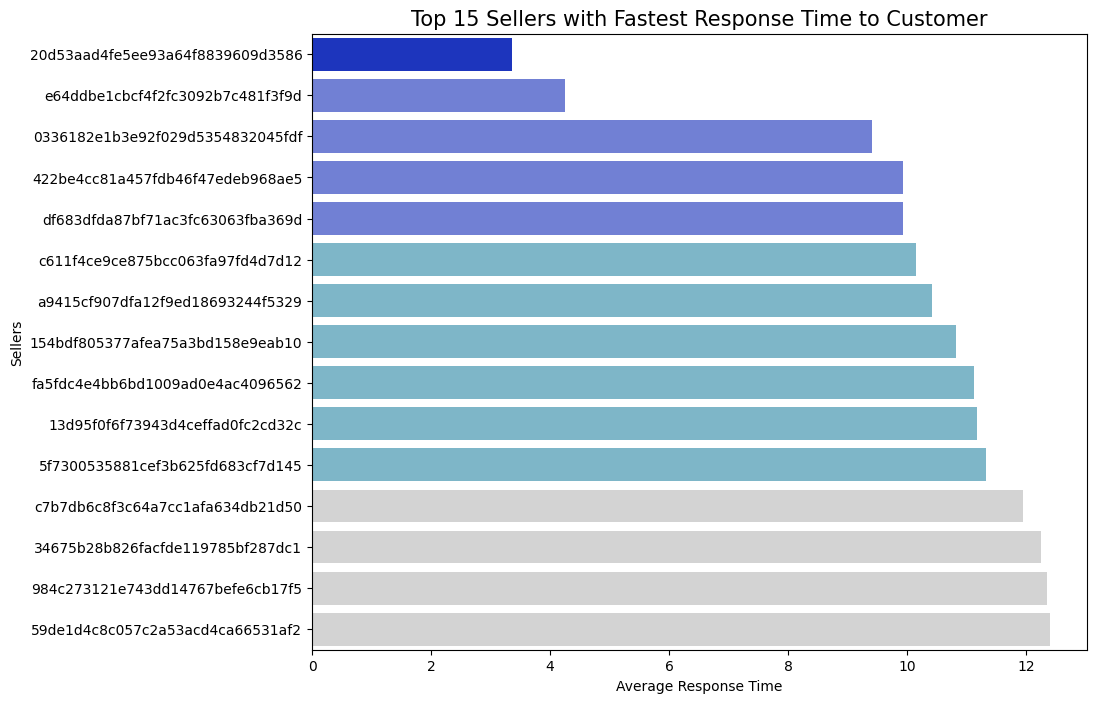

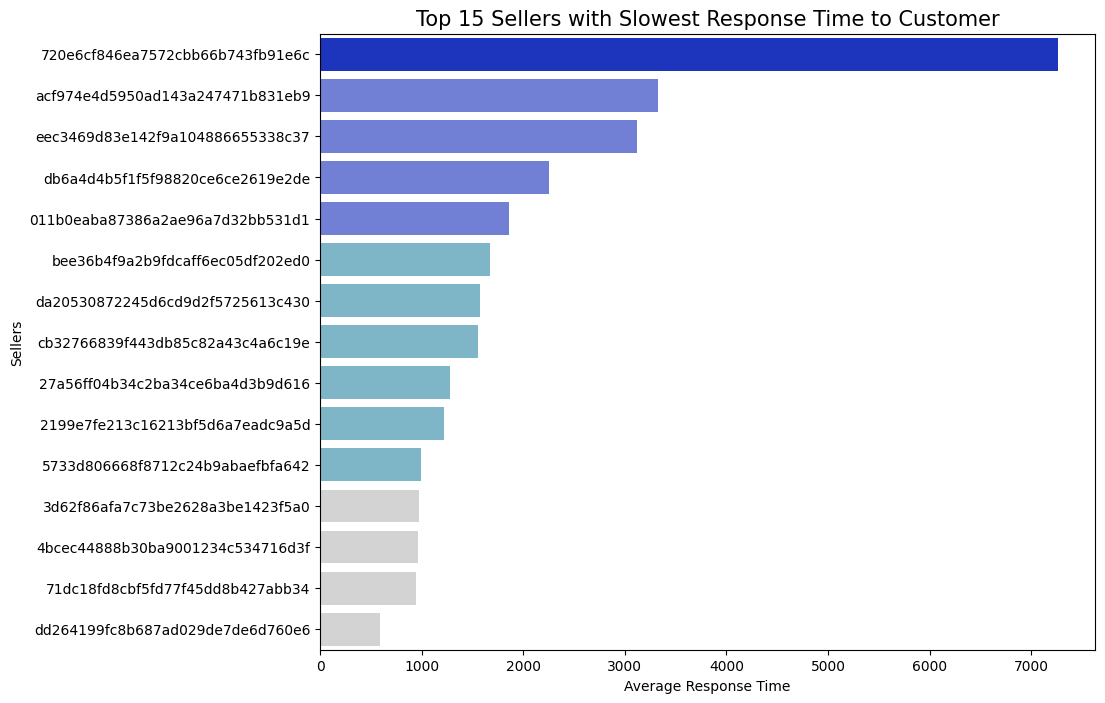

In [39]:
colors_ = ["#0323d7", "#6075e5", "#6075e5", "#6075e5", "#6075e5", "#72bcd4" ,"#72bcd4", "#72bcd4", "#72bcd4", "#72bcd4",
           "#72bcd4", "#d3d3d3", "#d3d3d3", "#d3d3d3", "#d3d3d3", "#d3d3d3", "#d3d3d3", "#d3d3d3", "#d3d3d3", "#d3d3d3"]

plt.figure(figsize=(10, 8))
sns.barplot(x='response_time', y='seller_id', palette=colors_,
            data=top_merchant.sort_values(by='response_time', ascending=True).head(15))
plt.title('Top 15 Sellers with Fastest Response Time to Customer', loc='center', fontsize=15)
plt.ylabel('Sellers')
plt.xlabel('Average Response Time')
plt.show()

plt.figure(figsize=(10, 8))
sns.barplot(x='response_time', y='seller_id', palette=colors_,
            data=top_merchant.sort_values(by='response_time', ascending=False).head(15))
plt.title('Top 15 Sellers with Slowest Response Time to Customer', loc='center', fontsize=15)
plt.ylabel('Sellers')
plt.xlabel('Average Response Time')
plt.show()

mencari tahu jumlah penjual berdasarkan rating dari 1 - 5
- membuat dataframe baru dari hasil groupby seller_id dengan nunique untuk menghitung jumlah seller
- dengan review rating sebagai agregator
- kemudian mengganti seller id menjadi seller count sebagai representasi jumlah penjual

In [ ]:
rating_seller = custrans_df.groupby('review_rating')['seller_id'].nunique().reset_index()
rating_seller.rename(columns={'seller_id':'seller_count'}, inplace=True)
rating_seller

,review_rating,seller_count
0,1.0,1501
1,2.0,860
2,3.0,1367
3,4.0,1919
4,5.0,2620


menampilkan jumlah penjual berdasarkan rating dengan barchart
- jumlah penjual dengan rating 5 masih menjadi terbanyak yang diikuti oleh penjual berating 4
- namun tidak sedikit penjual yang ternyata masih dibawah 3, dan penjual yang ratingnya 1 menjadi lebih banyak daripada penjual berating 2 dan 3

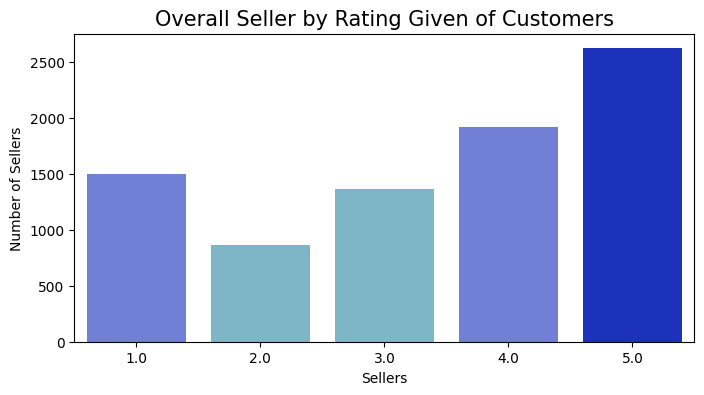

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(x='review_rating', y='seller_count', data=rating_seller,
            palette= ["#6075e5", "#72bcd4", "#72bcd4", "#6075e5", "#031fd5"])
plt.title('Overall Seller by Rating Given of Customers', loc='center', fontsize=15)
plt.ylabel('Number of Sellers')
plt.xlabel('Sellers')
plt.show()

### Kategori produk apa yang paling favorit dan kurang peminat?
membuat dataframe baru groupby jumlah order dengan nunique berdasarkan kategori produk
- diurutkan secara descending dengan parameter `ascending=False`, untuk menampikan jumlah teratas
- mengganti order id menjadi total orders sebagai representasi jumlah pesanan
- untuk mencari tahu jumlah pesanan berdasarkan produk kategori

In [ ]:
top_least_category = custrans_df.groupby('product_category')['order_id'].nunique().sort_values(ascending=False).reset_index()
top_least_category.rename(columns={'order_id':'total_orders'}, inplace=True)
top_least_category.head(15)

,product_category,total_orders
0,bed_bath_table,9159
1,health_beauty,8575
2,sports_leisure,7469
3,computers_accessories,6482
4,furniture_decor,6239
5,housewares,5692
6,watches_gifts,5431
7,telephony,4043
8,auto,3782
9,toys,3743


visualisasi kategori produk dengan barchart
- visualisasi yang kiri menampilkan produk dengan pesanan terbanyak
- visualisasi yang kanan menampilkan produk dengan pesanan paling sedikit

dibawah ini merupakan 5 produk paling diminati dan 5 produk yang kurang diminati

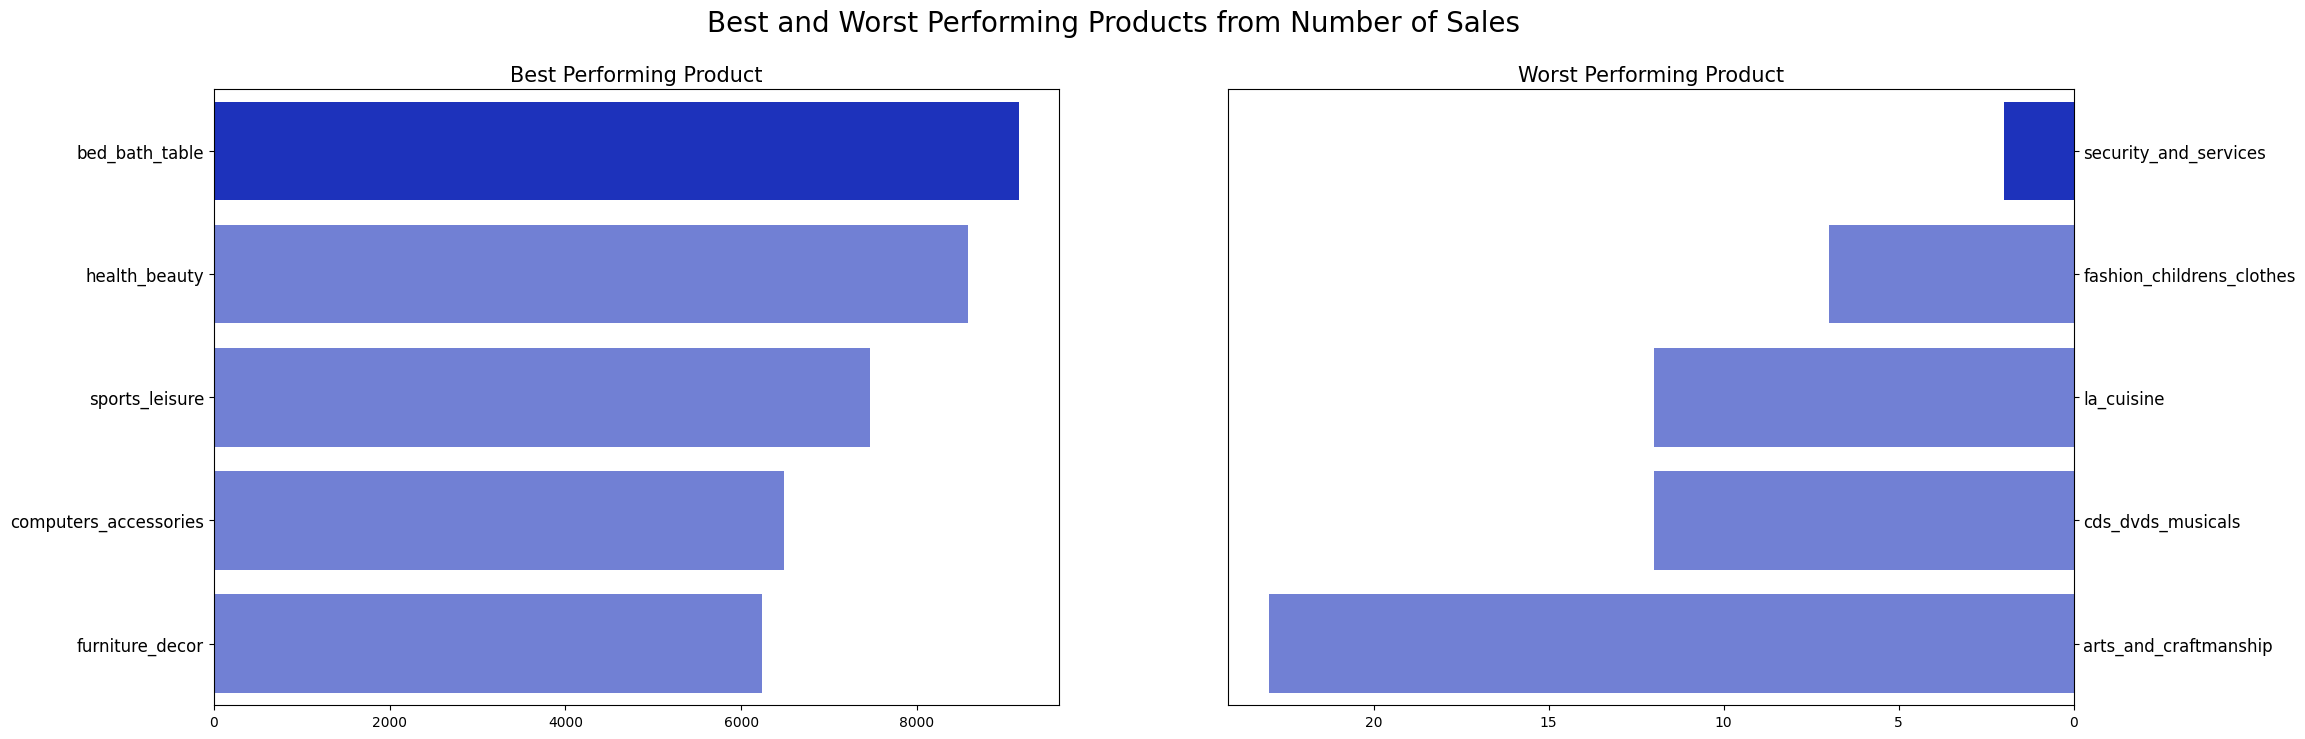

In [ ]:
# menggunakan subplots dengan object fig dan ax
fig, ax = plt.subplots(nrows = 1, ncols=2, figsize=(24, 8))

# color pallette
colors = ["#031fd5", "#6075e5", "#6075e5", "#6075e5", "#6075e5"]


# visualisasi produk dengan performa terbaik
sns.barplot(x='total_orders', y='product_category',palette = colors, ax=ax[0],
            data=top_least_category.head(5))
# ax[0] adalah object canvas pertama
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title('Best Performing Product', loc='center', fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)

# visualisasi produk dengan performa terburuk
sns.barplot(x='total_orders', y='product_category', palette = colors, ax=ax[1],
            data=top_least_category.sort_values(by='total_orders',
                                        ascending=True).head(5))
# ax[1] adalah object canvas kedua
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position('right')
ax[1].yaxis.tick_right()
ax[1].set_title('Worst Performing Product', loc='center', fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

# tampilkan visualisasi dengan judul menggunakan suptitle, karena pake sub
plt.suptitle('Best and Worst Performing Products from Number of Sales',
             fontsize=20)
plt.show()

### Bagaimana Penilaian Customer selama berbelanja dalam beberapa bulan terakhir?
membuat dataframe baru untuk mencari tahu penilaian custoemr
- menggunakan teknik groupby dengan review creation date sebagai agregator
- review creation date berada dengan rentang tahun 2016 dari bulan oktober hingga 2018 yang berakhir pada bulan agustus
- untuk memantau kepuasan customer selama berbelanja menggunakan olist

In [ ]:
# review_creation_date review_stars review_score
monthly_customer_satisfaction = custrans_df.resample(rule='M', on='review_creation_date').agg(
    {'review_rating':'count', 'review_score':'mean'}).round(2)
# monthly_customer_satisfaction.index = monthly_customer_satisfaction.index.strftime('%m-%Y')
monthly_customer_satisfaction = monthly_customer_satisfaction.reset_index()
monthly_customer_satisfaction.rename(columns={'review_rating':'rating_count', 'review_score':'average_rating'}, inplace=True)
monthly_customer_satisfaction.fillna(0, inplace=True)
monthly_customer_satisfaction

,review_creation_date,rating_count,average_rating
0,2016-10-31,206,4.06
1,2016-11-30,110,3.65
2,2016-12-31,19,3.37
3,2017-01-31,296,4.25
4,2017-02-28,1652,4.29
5,2017-03-31,2735,4.18
6,2017-04-30,2217,4.11
7,2017-05-31,4166,4.13
8,2017-06-30,3830,4.19
9,2017-07-31,3975,4.18


visualisasi penilaian customer dengan line chart
- line chart atas menampilkan jumlah kepuasan
- line chart bawah menampilkan rata-rata dari kepuasan customer

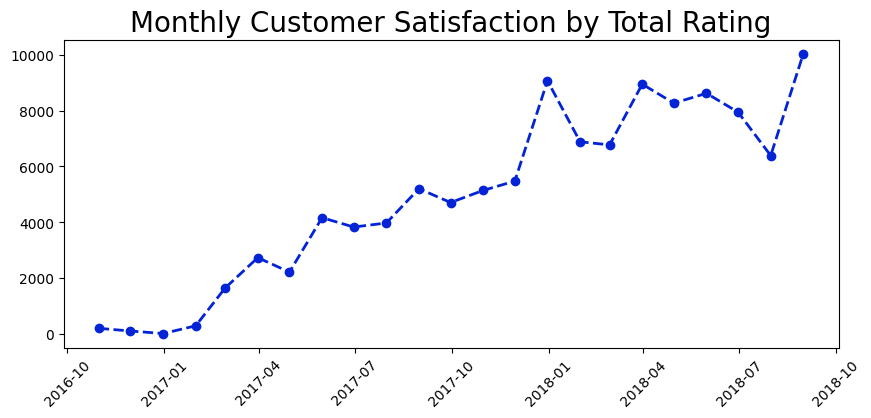

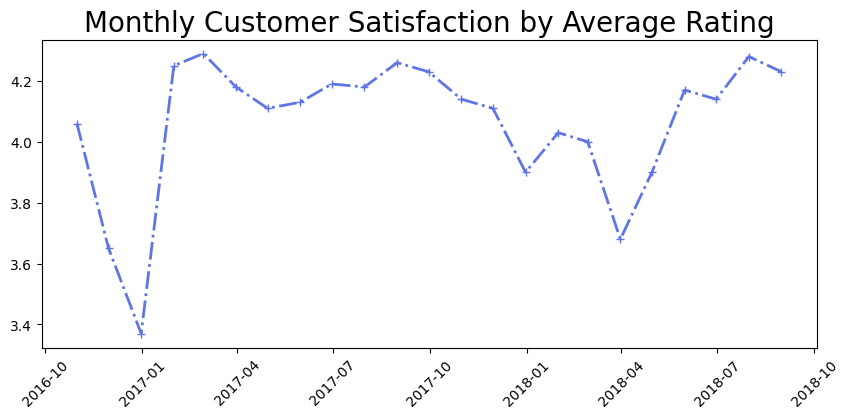

In [ ]:
# membuat visualisasi jumlah kepuasan dengan line chart
plt.figure(figsize=(10, 4))
plt.plot(monthly_customer_satisfaction['review_creation_date'], monthly_customer_satisfaction['rating_count'],
         marker='o', linestyle='--', linewidth=2, color="#0323d7")
plt.title('Monthly Customer Satisfaction by Total Rating', loc='center', fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(monthly_customer_satisfaction['review_creation_date'], monthly_customer_satisfaction['average_rating'],
         marker='+', linestyle='-.', linewidth=2, color="#6075e5")
plt.title('Monthly Customer Satisfaction by Average Rating', loc='center', fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

### Metode pembayaran transaksi yang paling sering digunakan oleh Pelanggan?
mengetahui metode pembayaran yang sering digunakan oleh customer pada masing-masing pemesanan produknya
- membuat datframe baru dengan group by pada tipe pembayaran sebagai agregator
- menghitung jumlah customer dan pemesanan dengan nunique

In [ ]:
# 'payment_type', 'order_id', 'product_id', 'customer_id'
payment_preference = custrans_df.groupby('payment_type')[['customer_id','order_id']].nunique().reset_index()
payment_preference

,payment_type,customer_id,order_id
0,boleto,18246,18705
1,credit_card,70226,72394
2,debit_card,1430,1445
3,voucher,3492,3578


menampilkan metode pembayaran yang sering dipakai dengan pie chart
- pie chart kiri menampilkan metode pembayaran berdasarkan jumlah customer yang memakai
- pie chart kanan menampilkan metode pembayaran berdasarkan riwayat transaksi pemesanan

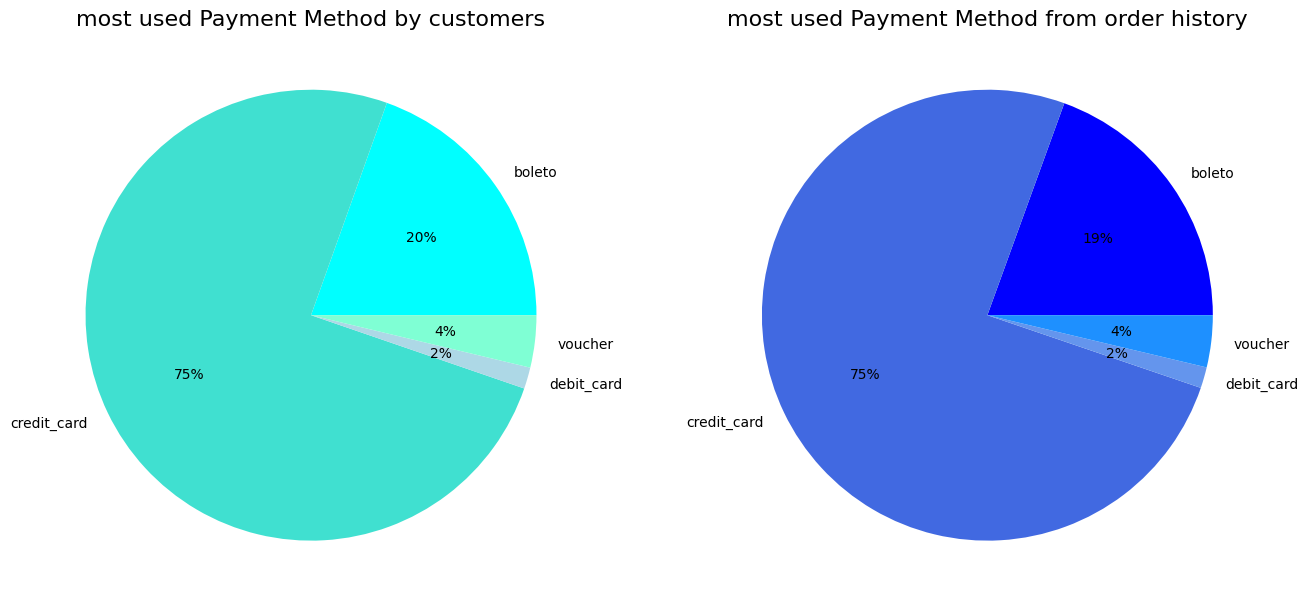

In [ ]:
fig = plt.figure(figsize=(16,8))

# left pie chart for number of customers
pie1 = fig.add_subplot(121)
pie1.pie(payment_preference['customer_id'], labels=payment_preference['payment_type'],
        autopct='%.0f%%', colors=('cyan','turquoise','lightblue', 'aquamarine'))
plt.title('most used Payment Method by customers', fontsize=16)

# piechart right for number of orders
pie2 = fig.add_subplot(122)
pie2.pie(payment_preference['order_id'], labels=payment_preference['payment_type'],
        autopct='%.0f%%', colors=('blue','royalblue','cornflowerblue','dodgerblue'))
plt.title('most used Payment Method from order history', fontsize=16)

plt.show()

### Bagaimana Demografi berdasarkan Domisili dari masing-masing Pelanggan dan Penjual?
membuat dataframe baru dengan groupby multiple index yaitu customer state atau customer city
- menghitung jumlah customer dengan nunique pada customer id
- multiple index untuk mencari tahu jumlah customer berdasarkan negara bagian dan kota

In [ ]:
# 'customer_city', 'customer_state', 'customer_id'
cust_domicile = custrans_df.groupby(by=['customer_state', 'customer_city'])['customer_id'].nunique().reset_index()
cust_domicile.rename(columns={'customer_id':'customer_count'}, inplace=True)
cust_domicile

,customer_state,customer_city,customer_count
0,Acre,brasileia,1
1,Acre,cruzeiro do sul,3
2,Acre,epitaciolandia,1
3,Acre,manoel urbano,1
4,Acre,porto acre,1
...,...,...,...
4197,Tocantins,silvanopolis,1
4198,Tocantins,sitio novo do tocantins,1
4199,Tocantins,taguatinga,3
4200,Tocantins,tocantinopolis,7


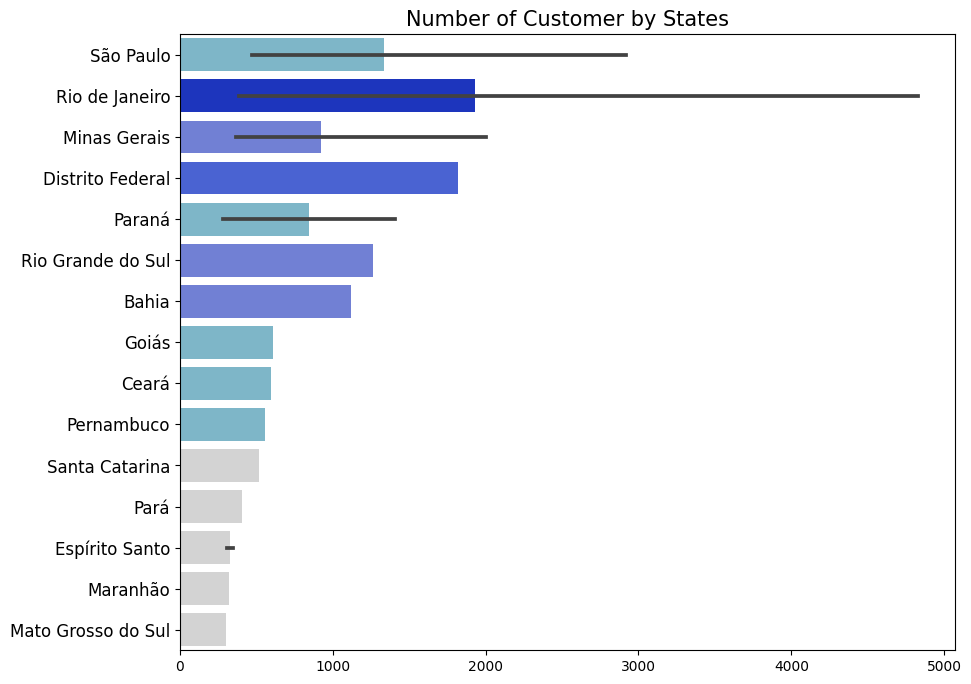

In [ ]:
plt.figure(figsize=(10, 8))
colors_ = ["#72bcd4", "#0323d7", "#6075e5", "#3454e8", "#72bcd4","#6075e5","#6075e5", "#72bcd4","#72bcd4", "#72bcd4",
           "#d3d3d3", "#d3d3d3", "#d3d3d3", "#d3d3d3", "#d3d3d3", "#d3d3d3","#d3d3d3", "#d3d3d3", "#d3d3d3"]
sns.barplot(x='customer_count', y='customer_state', palette=colors_,
            data=cust_domicile[['customer_state','customer_count']].sort_values(
                by='customer_count', ascending=False).head(40))
plt.title('Number of Customer by States', loc='center', fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

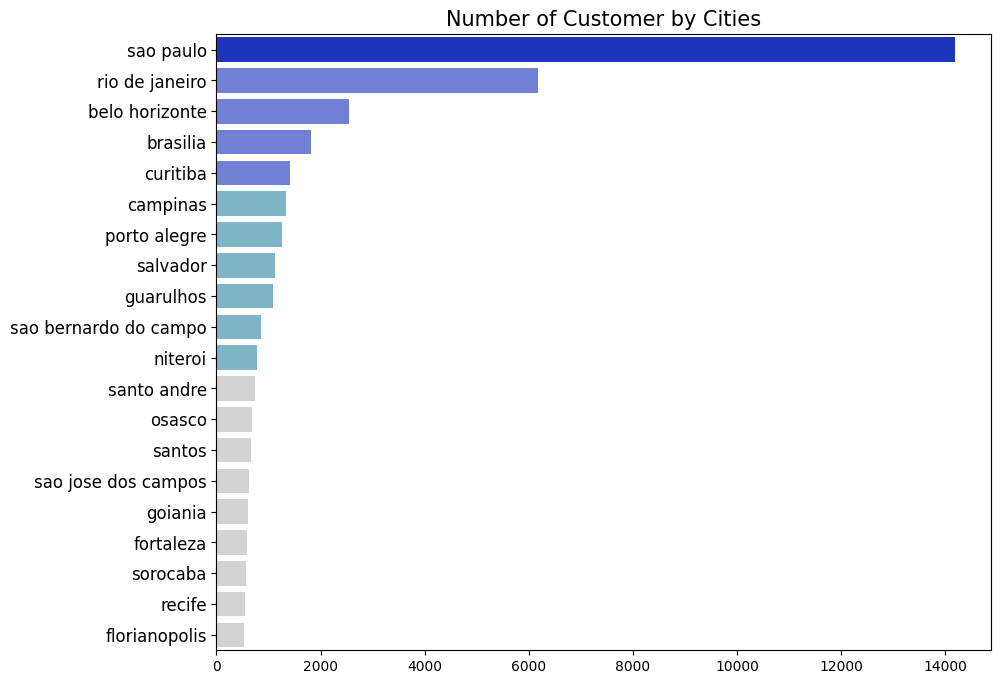

In [ ]:
plt.figure(figsize=(10, 8))
colors_ = ["#0323d7", "#6075e5", "#6075e5", "#6075e5", "#6075e5", "#72bcd4" ,"#72bcd4", "#72bcd4", "#72bcd4", "#72bcd4",
           "#72bcd4", "#d3d3d3", "#d3d3d3", "#d3d3d3", "#d3d3d3", "#d3d3d3", "#d3d3d3", "#d3d3d3", "#d3d3d3", "#d3d3d3"]
sns.barplot(x='customer_count', y='customer_city', palette=colors_,
            data=cust_domicile.sort_values(by='customer_count', ascending=False).head(20))
plt.title('Number of Customer by Cities', loc='center', fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

In [ ]:
# 'seller_city', 'seller_state', 'seller_id'
seller_domicile = custrans_df.groupby(by=['seller_state', 'seller_city'])['seller_id'].nunique().reset_index()
seller_domicile.rename(columns={'seller_id':'seller_count'}, inplace=True)
seller_domicile

,seller_state,seller_city,seller_count
0,Amazonas,manaus,1
1,Bahia,arraial d'ajuda (porto seguro),1
2,Bahia,bahia,1
3,Bahia,barro alto,1
4,Bahia,eunapolis,1
...,...,...,...
606,São Paulo,varzea paulista,1
607,São Paulo,vicente de carvalho,1
608,São Paulo,volta redonda,1
609,São Paulo,votorantim,4


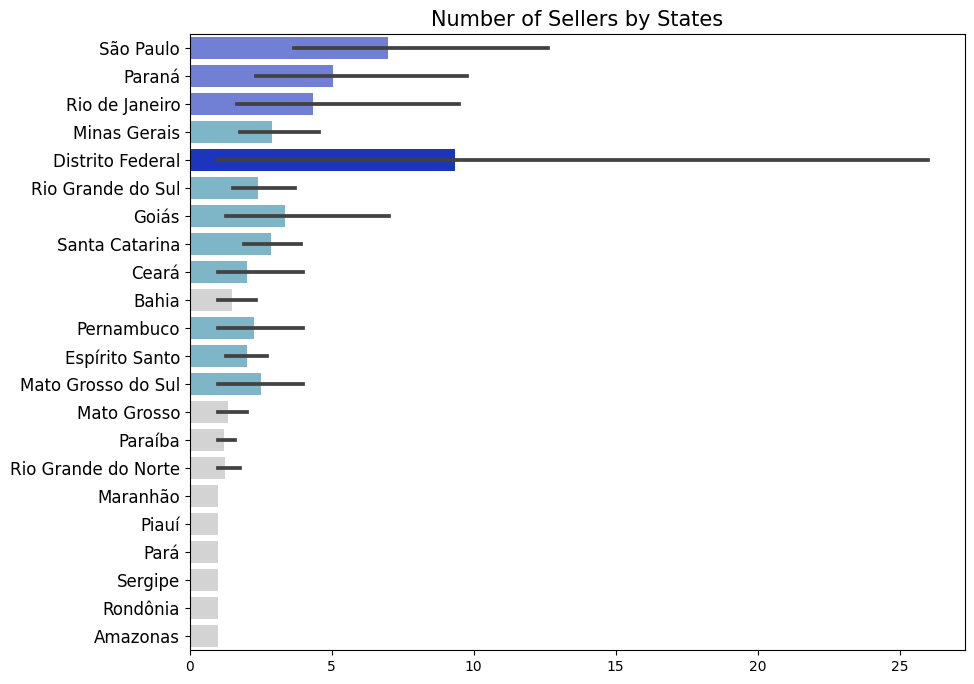

In [ ]:
plt.figure(figsize=(10, 8))
colors_ = ["#6075e5", "#6075e5","#6075e5", "#72bcd4", "#0323d7", "#72bcd4", "#72bcd4","#72bcd4","#72bcd4", "#D3D3D3", "#72bcd4",
           "#72bcd4","#72bcd4", "#d3d3d3", "#d3d3d3", "#d3d3d3","#d3d3d3", "#d3d3d3", "#d3d3d3","#d3d3d3", "#d3d3d3", "#d3d3d3"]
sns.barplot(x='seller_count', y='seller_state', palette=colors_,
            data=seller_domicile.sort_values(by='seller_count', ascending=False))
plt.title('Number of Sellers by States', loc='center', fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

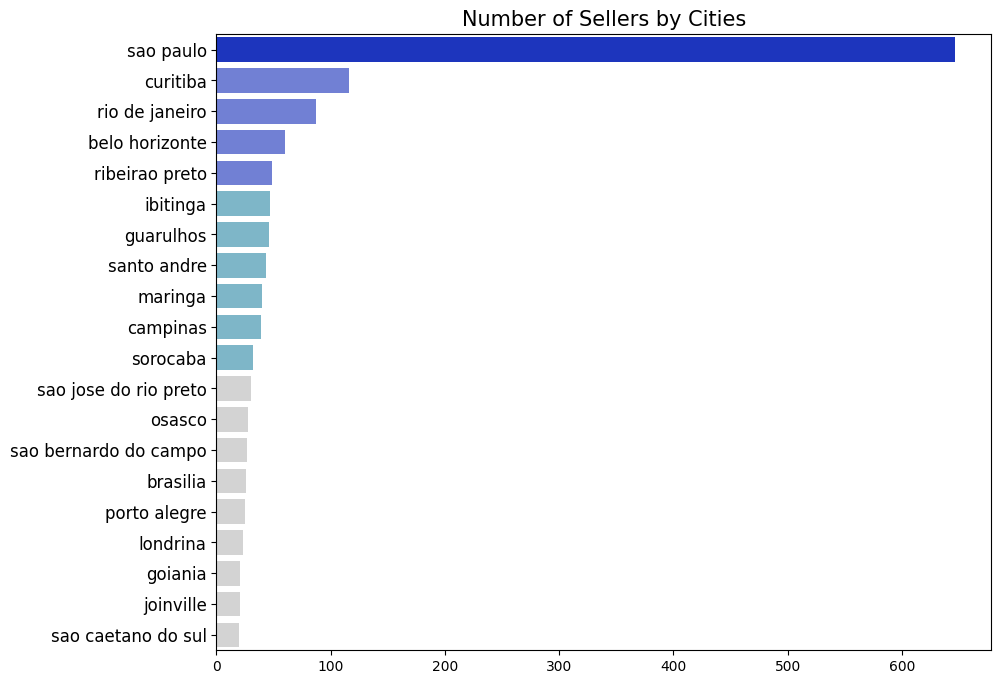

In [ ]:
plt.figure(figsize=(10, 8))
colors_ = ["#0323d7", "#6075e5", "#6075e5", "#6075e5", "#6075e5", "#72bcd4" ,"#72bcd4", "#72bcd4", "#72bcd4", "#72bcd4",
           "#72bcd4", "#d3d3d3", "#d3d3d3", "#d3d3d3", "#d3d3d3", "#d3d3d3", "#d3d3d3", "#d3d3d3", "#d3d3d3", "#d3d3d3"]
sns.barplot(x='seller_count', y='seller_city', palette=colors_,
            data=seller_domicile.sort_values(by='seller_count', ascending=False).head(20))
plt.title('Number of Sellers by Cities', loc='center', fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

### Berapa Durasi Pemesanan yang diperlukan berdasarkan Negara bagian dan Kota?
membuat dataframe baru dengan groupby multiple index yaitu customer state atau customer city
- menghitung pemesananan berdasarkan jumlah dan rata-rata
- multiple index untuk mencari tahu berdasarkan negara bagian dan kota
- teknik agregasi bisa menggunakan 2 numerik dengan metode statistik yang berbeda yaitu `sum` dan `mean`

In [ ]:
# customer_state customer_city order_process_time
domicile_process = custrans_df.groupby(by=['customer_state','customer_city'], as_index=False).agg(
    total_order_process = ('order_process_time','sum'), average_order_process = ('order_process_time','mean'))
domicile_process

,customer_state,customer_city,total_order_process,average_order_process
0,Acre,brasileia,2160.440000,720.146667
1,Acre,cruzeiro do sul,2138.936167,712.978722
2,Acre,epitaciolandia,432.507500,432.507500
3,Acre,manoel urbano,440.639667,440.639667
4,Acre,porto acre,959.342000,959.342000
...,...,...,...,...
4197,Tocantins,silvanopolis,407.489667,407.489667
4198,Tocantins,sitio novo do tocantins,1749.396500,437.349125
4199,Tocantins,taguatinga,1705.362000,568.454000
4200,Tocantins,tocantinopolis,3812.151833,476.518979


menampilkan total waktu proses pemesanan berdasarkan negara bagian customer teratas dengan bar chart

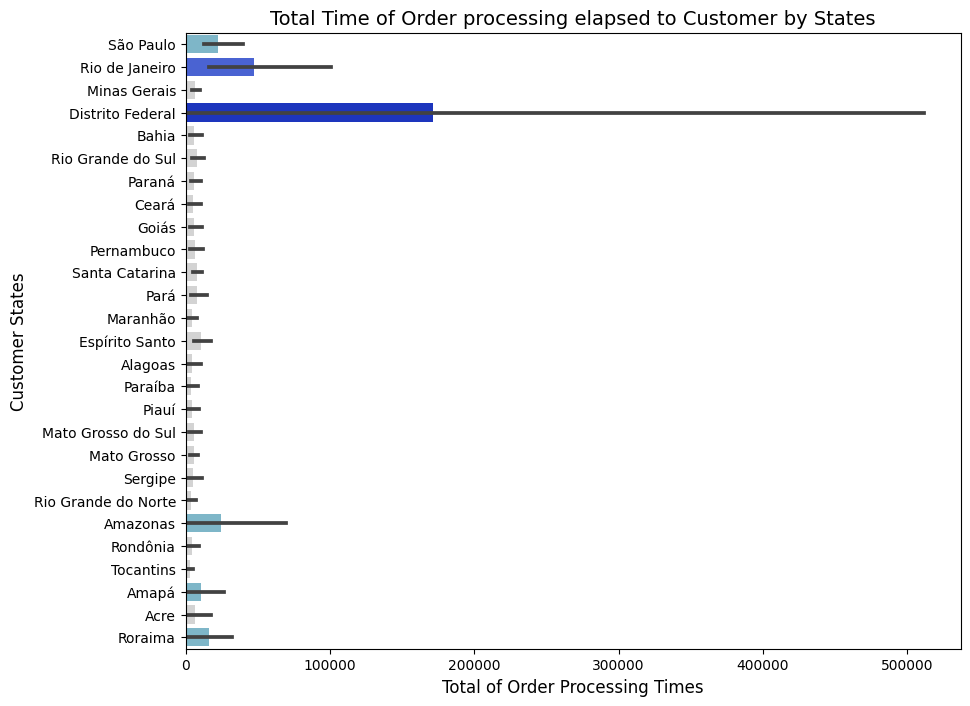

In [ ]:
plt.figure(figsize=(10,8))
colors_ = ["#72bcd4", "#3454e8", "#d3d3d3", "#0323d7", "#d3d3d3","#d3d3d3","#d3d3d3", "#d3d3d3","#d3d3d3", "#d3d3d3",
           "#d3d3d3", "#d3d3d3", "#d3d3d3", "#d3d3d3", "#d3d3d3", "#d3d3d3","#d3d3d3", "#d3d3d3", "#d3d3d3", "#d3d3d3",
           "#d3d3d3","#72bcd4", "#d3d3d3", "#d3d3d3", "#72bcd4", "#d3d3d3", "#72bcd4"]
sns.barplot(x='total_order_process', y='customer_state', palette=colors_,
            data=domicile_process.sort_values(by='total_order_process', ascending=False))
plt.title('Total Time of Order processing elapsed to Customer by States', size=14)
plt.ylabel('Customer States', size=12)
plt.xlabel('Total of Order Processing Times', size=12)
plt.show()

menampilkan rata-rata waktu proses pemesanan berdasarkan negara bagian customer teratas dengan bar chart

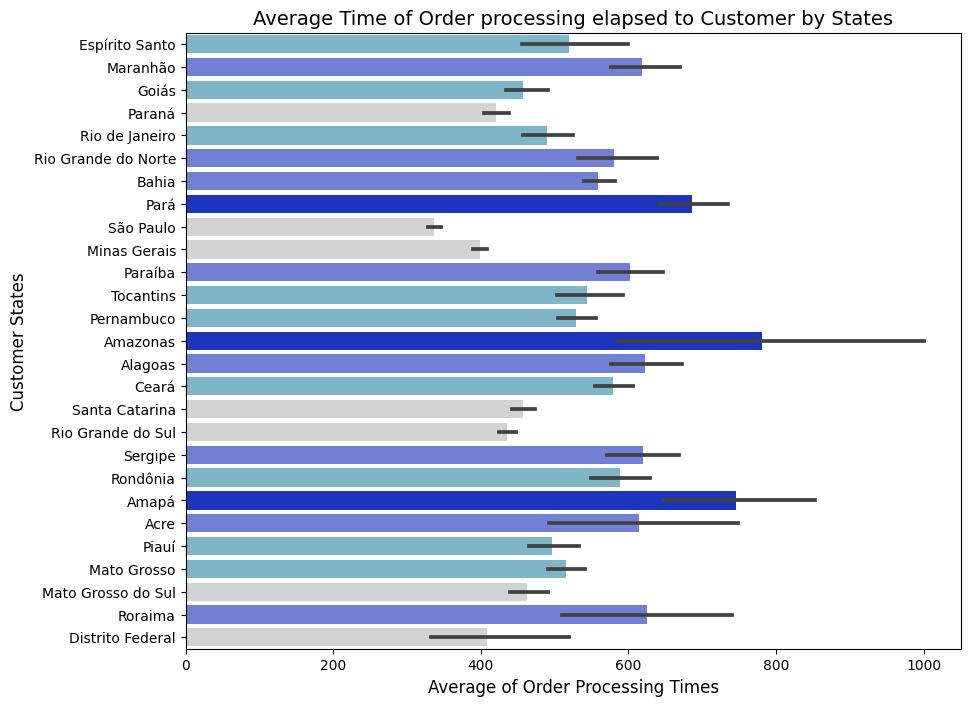

In [ ]:
plt.figure(figsize=(10,8)) #0323d7 #6075e5 #72bcd4
colors_ = ["#72bcd4", "#6075e5", "#72bcd4", "#d3d3d3", "#72bcd4", "#6075e5" ,"#6075e5", "#0323d7", "#d3d3d3", "#d3d3d3",
           "#6075e5", "#72bcd4", "#72bcd4", "#0323d7", "#6075e5", "#72bcd4", "#d3d3d3", "#d3d3d3", "#6075e5", "#72bcd4",
           "#0323d7", "#6075e5", "#72bcd4", "#72bcd4", "#d3d3d3", "#6075e5", "#d3d3d3"]
sns.barplot(x='average_order_process', y='customer_state', palette=colors_,
            data=domicile_process.sort_values(by='average_order_process', ascending=False))
plt.title('Average Time of Order processing elapsed to Customer by States', size=14)
plt.ylabel('Customer States', size=12)
plt.xlabel('Average of Order Processing Times', size=12)
plt.show()

menampilkan total waktu proses pemesanan berdasarkan kota customer bawah dengan barchart, sebagai kota dengan waktu pemrosesan terlambat

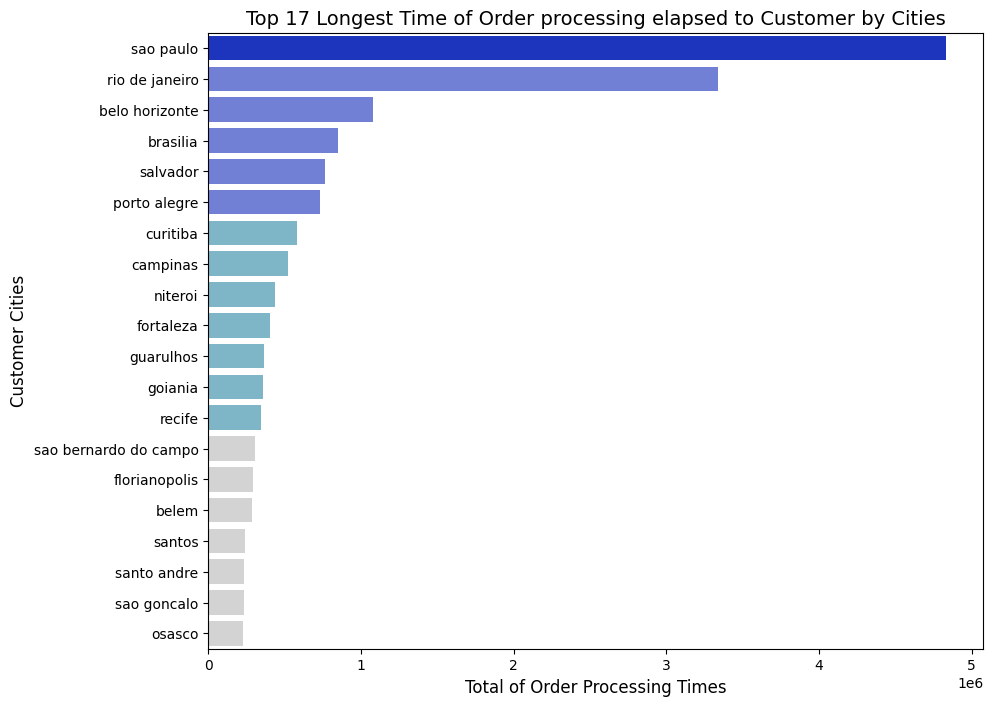

In [ ]:
plt.figure(figsize=(10,8))
colors_ = ["#0323d7", "#6075e5", "#6075e5", "#6075e5", "#6075e5", "#6075e5" ,"#72bcd4", "#72bcd4", "#72bcd4", "#72bcd4",
           "#72bcd4", "#72bcd4", "#72bcd4", "#d3d3d3", "#d3d3d3", "#d3d3d3", "#d3d3d3", "#d3d3d3", "#d3d3d3", "#d3d3d3"]
sns.barplot(x='total_order_process', y='customer_city', palette=colors_,
            data=domicile_process.sort_values(by='total_order_process', ascending=False).head(20))
plt.title('Top 17 Longest Time of Order processing elapsed to Customer by Cities', size=14)
plt.ylabel('Customer Cities', size=12)
plt.xlabel('Total of Order Processing Times', size=12)
plt.show()

menampilkan total waktu proses pemesanan berdasarkan kota customer teratas dengan barchart, sebagai kota dengan waktu pemrosesan tercepat

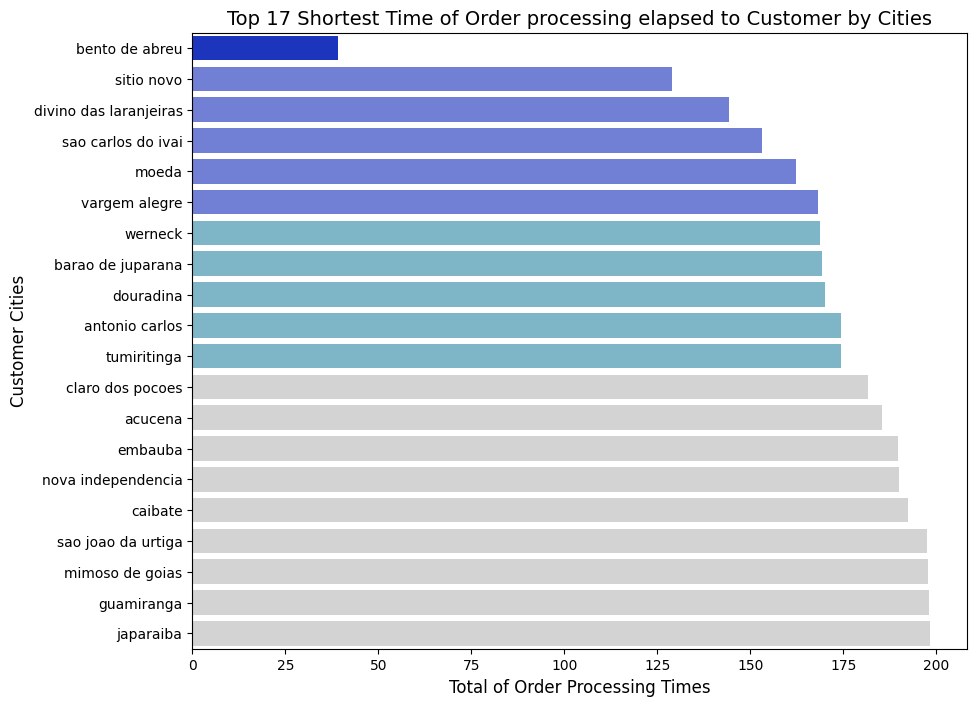

In [ ]:
plt.figure(figsize=(10,8))
colors_ = ["#0323d7", "#6075e5", "#6075e5", "#6075e5", "#6075e5", "#6075e5" ,"#72bcd4", "#72bcd4", "#72bcd4", "#72bcd4",
           "#72bcd4", "#d3d3d3", "#d3d3d3", "#d3d3d3", "#d3d3d3", "#d3d3d3", "#d3d3d3", "#d3d3d3", "#d3d3d3", "#d3d3d3"]
sns.barplot(x='total_order_process', y='customer_city', palette=colors_,
            data=domicile_process.sort_values(by='total_order_process', ascending=True).head(20))
plt.title('Top 17 Shortest Time of Order processing elapsed to Customer by Cities', size=14)
plt.ylabel('Customer Cities', size=12)
plt.xlabel('Total of Order Processing Times', size=12)
plt.show()

menampilkan rata-rata waktu proses pemesanan berdasarkan kota customer bawah dengan barchart, sebagai kota dengan waktu pemrosesan terlambat

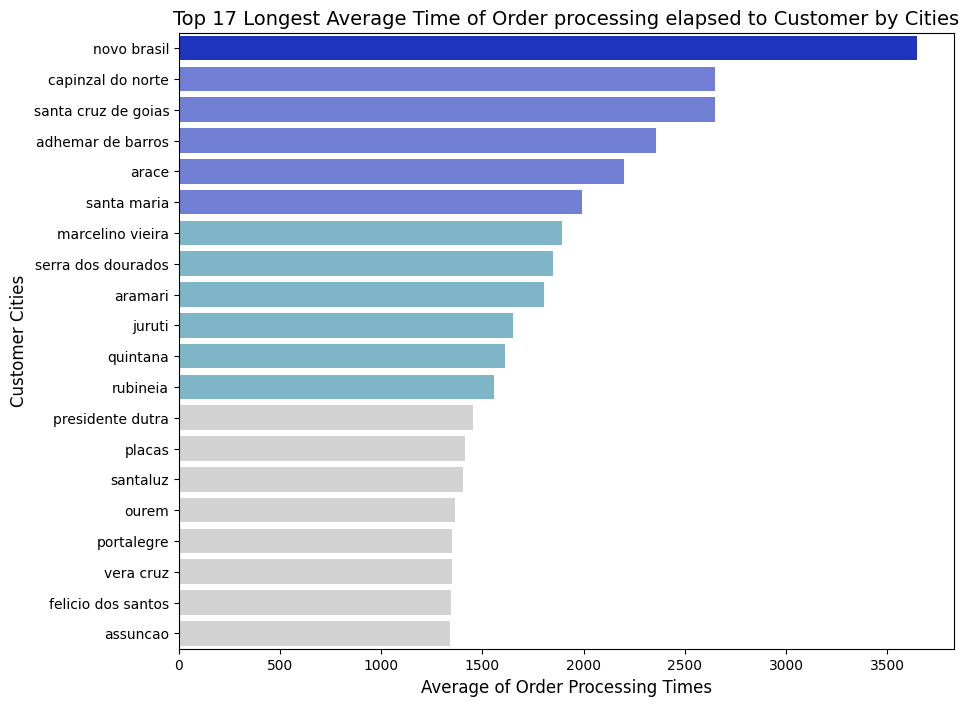

In [ ]:
plt.figure(figsize=(10,8))
colors_ = ["#0323d7", "#6075e5", "#6075e5", "#6075e5", "#6075e5", "#6075e5" ,"#72bcd4", "#72bcd4", "#72bcd4", "#72bcd4",
           "#72bcd4", "#72bcd4", "#d3d3d3", "#d3d3d3", "#d3d3d3", "#d3d3d3", "#d3d3d3", "#d3d3d3", "#d3d3d3", "#d3d3d3"]
sns.barplot(x='average_order_process', y='customer_city', palette=colors_,
            data=domicile_process.sort_values(by='average_order_process', ascending=False).head(20))
plt.title('Top 17 Longest Average Time of Order processing elapsed to Customer by Cities', size=14)
plt.ylabel('Customer Cities', size=12)
plt.xlabel('Average of Order Processing Times', size=12)
plt.show()

menampilkan rata-rata waktu proses pemesanan berdasarkan kota customer teratas dengan barchart, sebagai kota dengan waktu pemrosesan tercepat

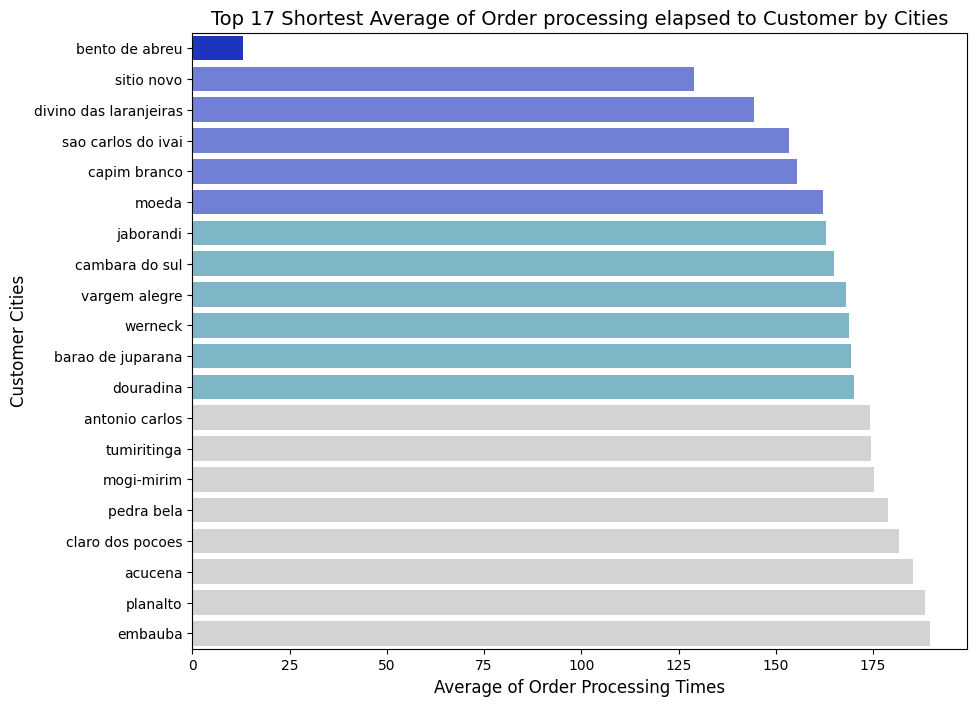

In [ ]:
plt.figure(figsize=(10,8))
colors_ = ["#0323d7", "#6075e5", "#6075e5", "#6075e5", "#6075e5", "#6075e5" ,"#72bcd4", "#72bcd4", "#72bcd4", "#72bcd4",
           "#72bcd4", "#72bcd4", "#d3d3d3", "#d3d3d3", "#d3d3d3", "#d3d3d3", "#d3d3d3", "#d3d3d3", "#d3d3d3", "#d3d3d3"]
sns.barplot(x='average_order_process', y='customer_city', palette=colors_,
            data=domicile_process.sort_values(by='average_order_process', ascending=True).head(20))
plt.title('Top 17 Shortest Average of Order processing elapsed to Customer by Cities', size=14)
plt.ylabel('Customer Cities', size=12)
plt.xlabel('Average of Order Processing Times', size=12)
plt.show()

## RFM Analysis
teknik analisis lanjutan berupa metode yang umum  digunakan untuk melakukan segmentasi pelanggan berdasarkan parameter **recency**, **frequency**, **monetary**
- **Recency**, paremeter untuk melihat waktu transaksi terakhir kali oleh pelanggan
- **Frequency**, paremeter untuk mengidentifikasi frekuensi pelanggan melakukan transaksi
- **Monetary**, paremeter untuk mengidentifikasi besaran revenue yang berasal dari pelanggan

parameter ini berguna untuk untuk identifikasi pelanggan dengan kriteria
- **high value**, sering transaksi dengan kontribusi revenue yang besar
- **low value**, jarang transaksi dengan kontribusi revenue yang kecil

diawali dengan membuat dataframe baru dengan teknik groupby pada
- order approved at sebagai waktu pesanan diterima
- jumlah customer dengan nunique customer id
- total amount dengan sum sebagai total pembayaran
- dengan customer id sebagai agregator

In [25]:
# order_approved_at order_id total_amount
rfm_df = custrans_df.groupby('customer_id', as_index=False).agg(
    {'order_approved_at':'max','order_id':'nunique','total_amount':'sum'})
rfm_df.sort_values(by='total_amount', ascending=False).head(10)

,customer_id,order_approved_at,order_id,total_amount
3633,0a0a92112bd4c708ca5fde585afaa872,2017-10-02 15:28:20,1,13664.08
70048,c4b224d2c784bae11ae98b6ae9f2454c,2017-05-29 14:25:14,1,11111.40
47535,85963fd37bfd387aa6d915d8a1065486,2018-02-21 12:28:15,1,10553.28
67841,be74c431147c32ab2d7c7cef5e4a995f,2018-05-11 09:40:13,1,10055.22
84723,edf81e1f3070b9dac83ec83dacdbb9bc,2017-04-18 20:50:13,1,8389.52
31492,58483a1c055dfb600f57c5b867174542,2018-06-05 14:31:37,1,8068.88
5822,1033eef37a760a832f9b2332ce23fdc5,2017-09-06 17:15:08,1,8030.46
77650,da122df9eeddfedc1dc1f5349a1a690c,2017-04-03 13:25:19,2,7571.63
17175,301d1ce5a76b7e1bc47e5115bf5eb6ba,2018-06-26 23:28:20,1,7413.70
42101,763c8b1c9c68a0229c42c9fc6f662b93,2018-07-17 04:31:36,1,7274.88


menghitung recency berdasarkan tanggal pesanan yang diterima pada `order_approved_at`
- dengan transformasi menjadi tipe datetime terlebih dulu, kemudian mengambil date dari datetime melalui variabel dt
- kemudian menghitung recent date dengan metode `.max()`
- menggunakan almbda untuk menghitung recency dan mengurangi recent date dengan tiap x
- terakhir mengganti order id menjadi frequency dan total amount sebagai monetary

In [26]:
rfm_df['order_approved_at'] = pd.to_datetime(rfm_df['order_approved_at'])
rfm_df['order_approved_at'] = rfm_df['order_approved_at'].dt.date

recent_date = rfm_df['order_approved_at'].max()
rfm_df['recency'] = rfm_df['order_approved_at'].apply(lambda x: (recent_date - x).days)
rfm_df.rename(columns={'order_id':'frequency', 'total_amount':'monetary'}, inplace=True)
rfm_df.sort_values(by='monetary', ascending=False).head(10)

,customer_id,order_approved_at,frequency,monetary,recency
3633,0a0a92112bd4c708ca5fde585afaa872,2017-10-02,1,13664.08,331
70048,c4b224d2c784bae11ae98b6ae9f2454c,2017-05-29,1,11111.40,457
47535,85963fd37bfd387aa6d915d8a1065486,2018-02-21,1,10553.28,189
67841,be74c431147c32ab2d7c7cef5e4a995f,2018-05-11,1,10055.22,110
84723,edf81e1f3070b9dac83ec83dacdbb9bc,2017-04-18,1,8389.52,498
31492,58483a1c055dfb600f57c5b867174542,2018-06-05,1,8068.88,85
5822,1033eef37a760a832f9b2332ce23fdc5,2017-09-06,1,8030.46,357
77650,da122df9eeddfedc1dc1f5349a1a690c,2017-04-03,2,7571.63,513
17175,301d1ce5a76b7e1bc47e5115bf5eb6ba,2018-06-26,1,7413.70,64
42101,763c8b1c9c68a0229c42c9fc6f662b93,2018-07-17,1,7274.88,43


### Mencari Insight dengan visualisasi RFM
- Kapan transaksi terakhir kali yang dilakukan pelanggan?
- Berapa kali pelanggan melakukan pembelian selama beberapa bulan terakhir?
- Berapa uang yang dihasilkan pelanggan dalam beberapa bulan terakhir?

hasil akhir ditampilkan berupa 5 customer teratas dari masing-masing recency, frequency dan monetary, maka dari itu disimpulkan dengan
- 5 customer teratas melakukan transaksi sebanyak 500-300 kali, dapat diasumsikan 10-20 customer dibawahnya melakukan transaski sekitar 300 hingga kurang dari 200 kali
- 5 customer teratas terakhir kali melakukan transaksi 3-2 kali, karena jumlah transaksi yang dilakukan customer sebagian besar hanya sekali
- 5 customer teratas membelanjakan uangnya dengan rentang 10000 hingga diatas 4000, dapat diasumsikan 10-20 customer dibawahnya melakukan transaksi sekitar 8000an hingga 2000an

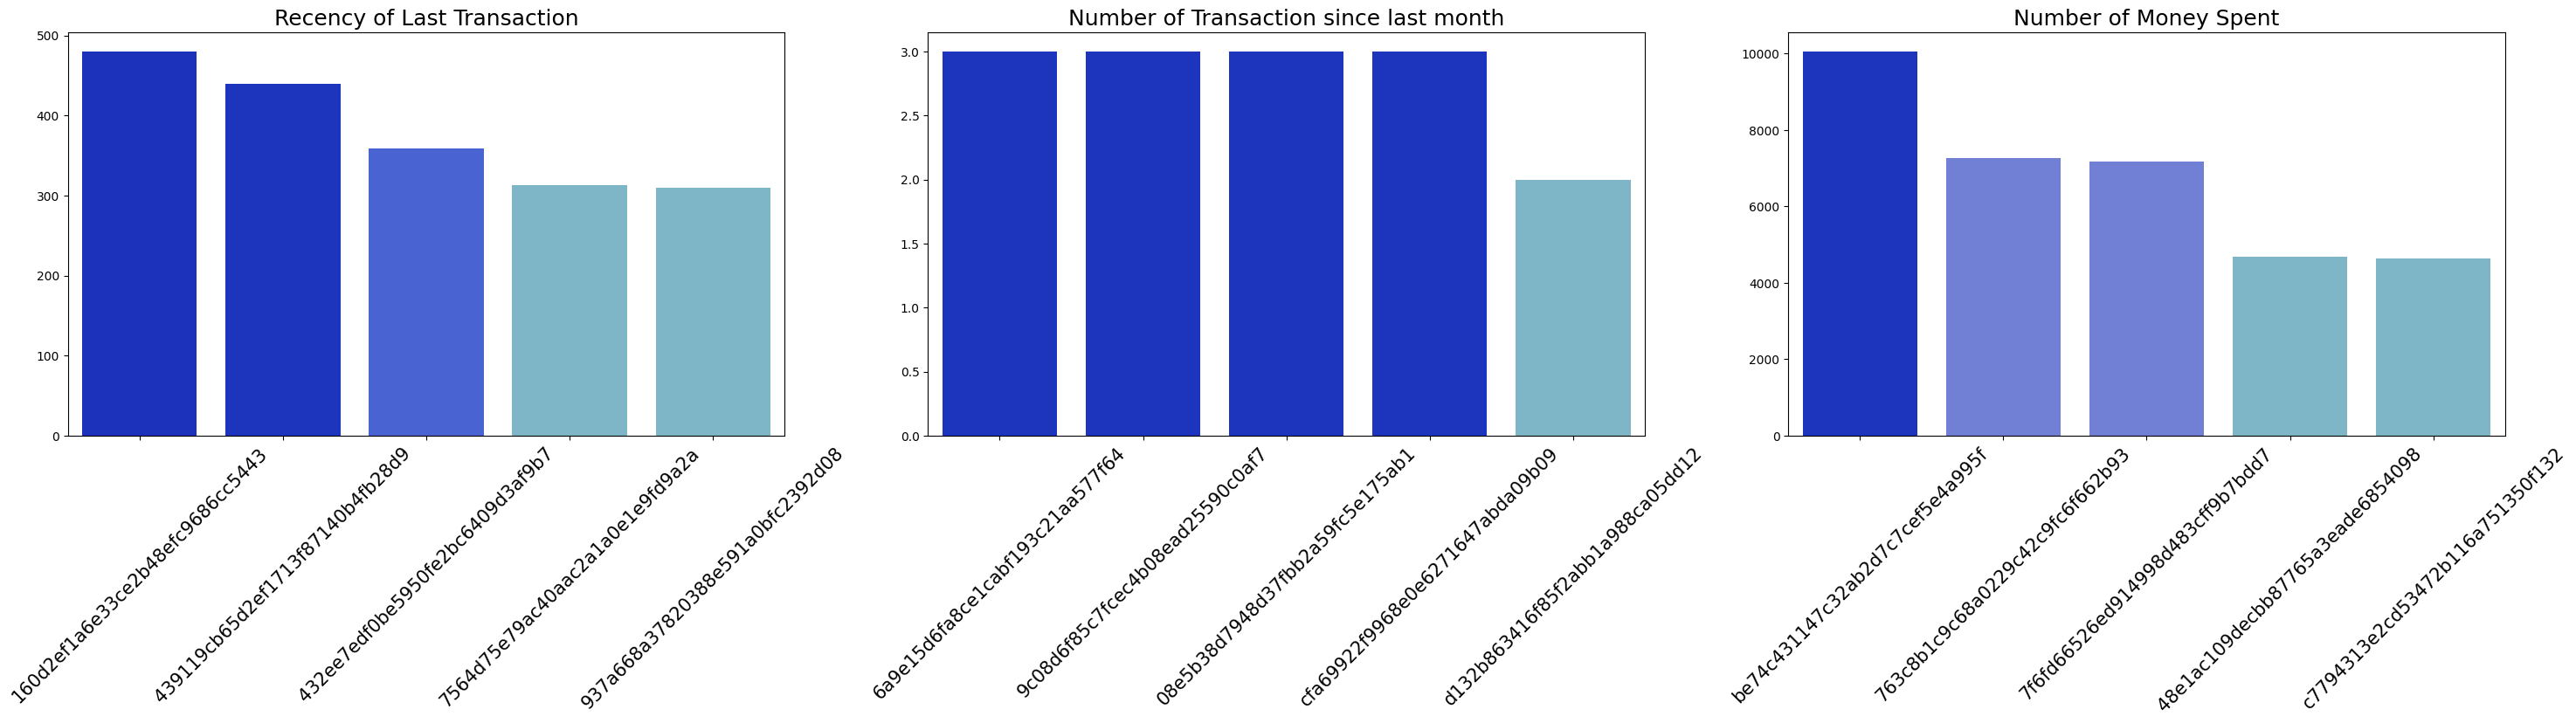

In [ ]:
# buat 3 kolom visualisasi
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(36, 6))

# color palette

# mencari tahu terakhir kali melakukan transaksi
sns.barplot(y='recency', x='customer_id', palette=["#031fd5", "#0323d7", "#3454e8", "#72bcd4", "#72bcd4"], ax=ax[0],
            data=rfm_df.sort_values(by='recency', ascending=False).head(5))
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title('Recency of Last Transaction', loc='center', fontsize=18)
ax[0].tick_params(axis='x', labelsize=15, rotation=45)

# menghitung frequenci pelanggan melakukan transaksi pada bulan terakhir
sns.barplot(y='frequency', x='customer_id', palette=["#0323d7", "#0323d7", "#0323d7", "#0323d7", "#72bcd4"], ax=ax[1],
            data=rfm_df.sort_values(by='frequency', ascending=False).head(5))
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title('Number of Transaction since last month', loc='center', fontsize=18)
ax[1].tick_params(axis='x', labelsize=15, rotation=45)

# mengitung banyaknya uang yang dihabiskan customer
sns.barplot(y='monetary', x='customer_id', palette=["#0323d7", "#6075e5", "#6075e5", "#72bcd4", "#72bcd4"], ax=ax[2],
            data=rfm_df.sort_values(by='monetary', ascending=False).head(5))
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title('Number of Money Spent', loc='center', fontsize=18)
ax[2].tick_params(axis='x', labelsize=15, rotation=45)

### Mencari Segmentasi dari hasil RFM Analysis
suitable scale according to the size of your customer base:
- 1 – 3 scale for less than 30k customers
- 1 – 4 scale for 30k – 200k customers
- 1 – 5 scale for more than 200k customers

penentuan ranking dari quantile dengan function `pd.qcut` dengan skala 1-4
- recency, makin dikit nilainya semakin besar nilainya (berbanding terbalik) yaitu 4-1
- monetary, semakin besar nilai semakin besar rankingnya (tegak lurus) yaitu 1-4
- sedangkan frequency paling tidak seimbang karena semua quantilenya satu, yang artinya sebagian besar frekuensi customer transaksi di dominasi 1 kali transaksi

In [28]:
# frequency unique value 1, 2, 3, 4, 5, 6, 7, 9, 14
def frequency_score(frequency):
    freq_score = None
    # kalau frequency 1, 2, 3
    if frequency <=3:
        freq_score = 1
    elif frequency <=6:
        freq_score = 2
    elif frequency <=9:
        freq_score = 3
    else:
        freq_score = 4
    return freq_score

# perhitungan nilai dari nilai masing-masign pada recency, frequency dan monetary
rfm_df['r_score'] = pd.qcut(rfm_df['recency'], 4, labels=[4, 3, 2, 1], duplicates='drop')
rfm_df['f_score'] = rfm_df['frequency'].apply(frequency_score)
rfm_df['m_score'] = pd.qcut(rfm_df['monetary'], 4, labels=[1, 2, 3, 4], duplicates='drop')

# # kemudian masing-msaing nilai dari recency, frequency dan monetary dihitung rata-ratanya
rfm_df['rfm_score'] = rfm_df['r_score'].astype(int) + rfm_df['f_score'].astype(int) + rfm_df['m_score'].astype(int)
rfm_df['rfm_score'] = (rfm_df['rfm_score']/3).round(2)

untuk menghitung nilai recency dan monetary menggunakan teknik qcut untuk membagi menjadi 4 quantile dengan masing-masing nama kelompok
- hal ini karena recency dan monetary memiliki distribusi yang sama
- sedangkan frequency memiliki distribusi yang berbeda karena sebagian besar bernilai 1
- maka frequency menggunakan teknik terpisah yaitu dengan function apply untuk menjalankan multiple condition berdasarkan value dari frequenc

hasil akhir dari masing-masing freuency recency dan monetary dihitung rata-ratanya dengan skala 1-4

In [27]:
# print(len(rfm_df['customer_id']))
# display(((rfm_df['recency'].rank(ascending=False))/(rfm_df['recency'].rank(ascending=False)).max())*100)
# display(((rfm_df['frequency'].rank(ascending=False))/(rfm_df['frequency'].rank(ascending=False)).max())*100)
# display(((rfm_df['monetary'].rank(ascending=False))/(rfm_df['monetary'].rank(ascending=False)).max())*100)

# rfm_df[['customer_id','rfm_score']]
# sorted(rfm_df['rfm_score'].unique())
display(rfm_df[['recency', 'frequency', 'monetary']].quantile(q=[.25, .5, .75]))

,recency,frequency,monetary
0.25,113.0,1.0,63.97
0.50,217.0,1.0,110.02
0.75,344.0,1.0,188.50




Nama Segment dari Customer
- High Value Customer, `rfm_score` > 3
- Medium Value Customer, `rfm_score` > 2
- Low Value Customer, `rfm_score` > 1

In [ ]:
# defining customer segment
def customer_segment(rfm_score):
    segment = ''
    # High Value Customer, `rfm_score` > 3
    if rfm_score >=3:
        segment = 'High Value Customer'
    # Medium Value Customer, `rfm_score` > 2
    elif rfm_score >=2:
        segment = 'Medium Value Customer'
    # Low Value Customer, `rfm_score` > 1
    else:
        segment = 'Low Value Customer'
    return segment

rfm_df['cust_segment'] = rfm_df['rfm_score'].apply(customer_segment)

### Bagaimana Penilaian terhadap pelanggan berdasarkan hasil Segmentasi?
Visualisasi hasil Segmentasi Pelanggan berdasarkan Analisis RFM,
- sebagian beasr customer bernilai medium value dan low value
- customer yang high value sangat sedikit, hal ini karena masih sedikit customer yang loyal
- dapat diasumsikan sebagian customer belum atau kurang nyaman

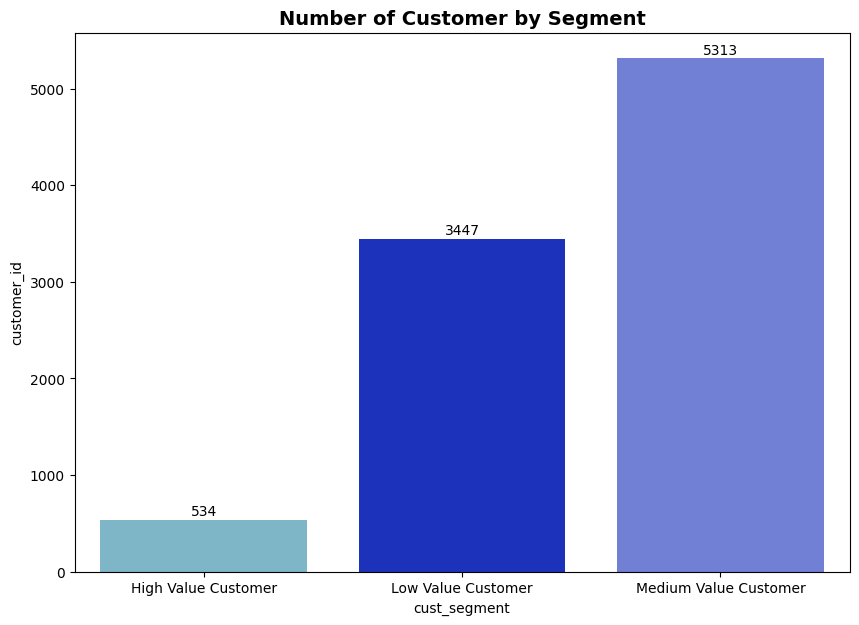

In [ ]:
plt.figure(figsize=(10,7))
aux = rfm_df.groupby('cust_segment')['customer_id'].nunique().reset_index()
sbar = sns.barplot(data=aux, x='cust_segment', y='customer_id', palette=['#72bcd4', '#031fd5', '#6075e5'])

# bar plot annotation
for p in sbar.patches:
    sbar.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center', xytext = (0, 6), textcoords = 'offset points')

plt.title('Number of Customer by Segment', fontsize=14, fontweight='bold')
plt.show()

### Bagaimana Perilaku masing-masing pelanggan berdasarkan Segmentasi?
berikut analisis perilaku pelanggan berdasarkan distribusi boxplot dengan masing-masing recency, frequency dan monetary yang dibagi oleh segment customer
- pada frequency tidak menampilkan jumlah signifikan
- customer yang high value menampilkan recency yang paling sedikit dan monetary yang paling banyak, artinya sering belanja dan paling banyak membelanjakan uang
- sedangkan customer low value menampilkan recency yang paling banyak dan monetary yang paling sedikit, artinya tidak sering atau hampir jarang belanja dan paling sedikit membelanjakan uang

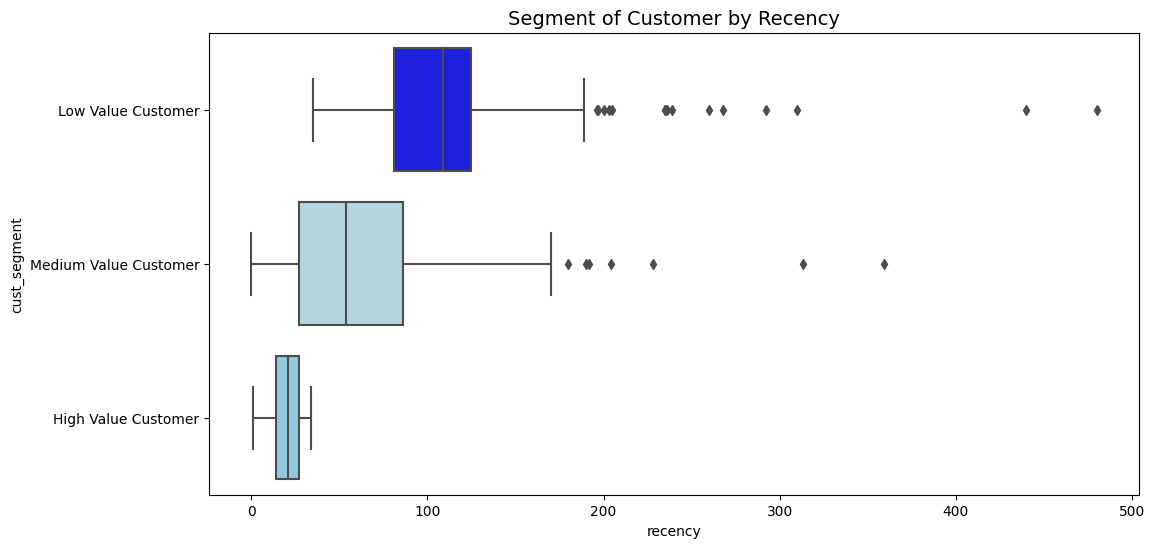

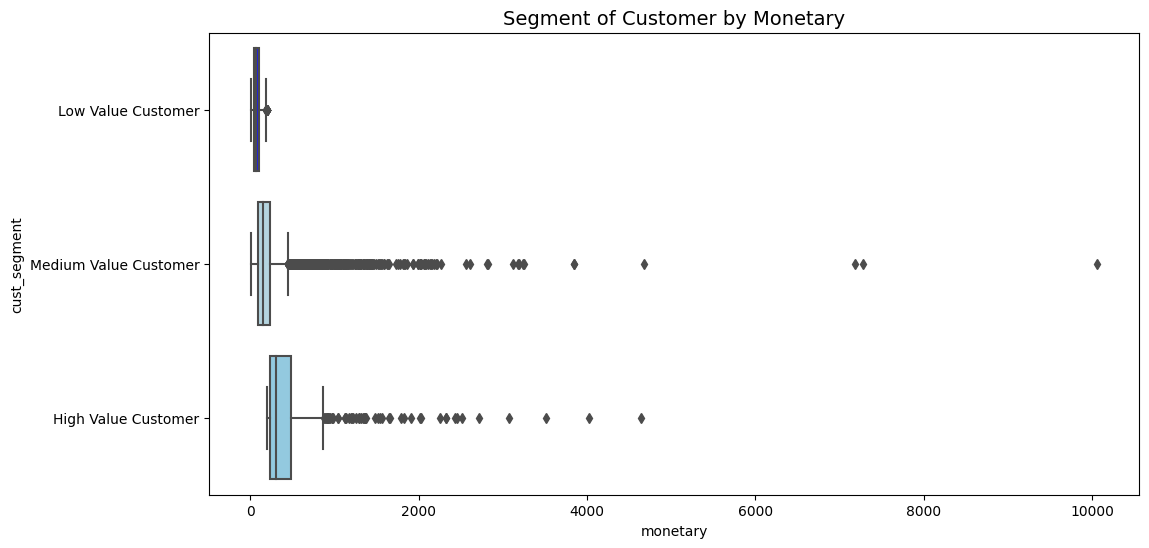

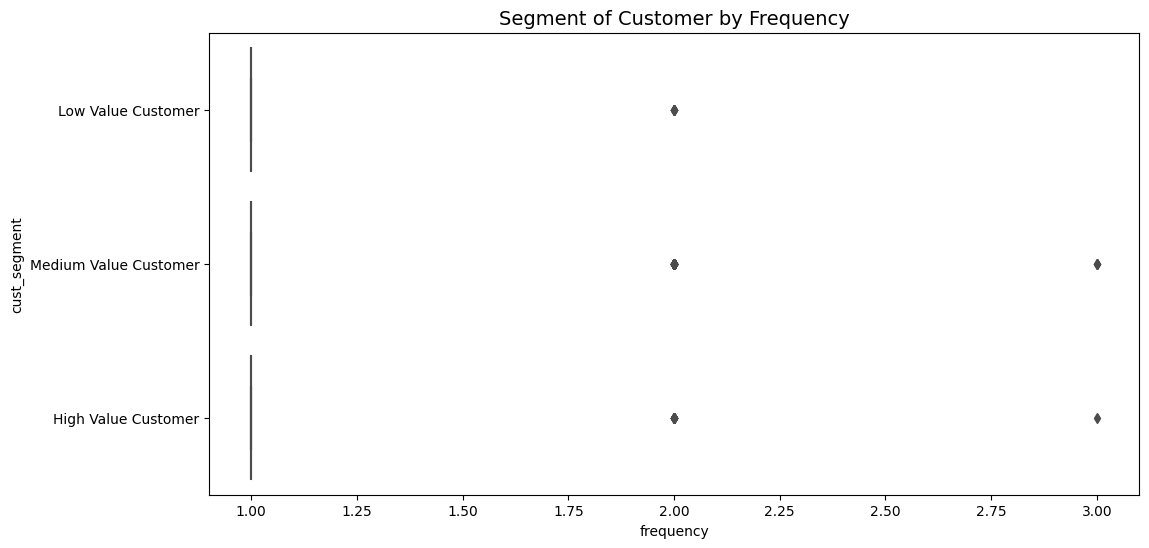

In [ ]:
# customer segment by recency distribution
plt.figure(figsize=(12,6))
sns.boxplot(x='recency', y='cust_segment', data=rfm_df,
            palette={"High Value Customer": "skyblue", "Medium Value Customer": "lightblue", "Low Value Customer":"blue"})
plt.title('Segment of Customer by Recency', fontsize=14)
plt.show()

# customer segment by monetary distribution
plt.figure(figsize=(12,6))
sns.boxplot(x='monetary', y='cust_segment', data=rfm_df,
            palette={"High Value Customer": "skyblue", "Medium Value Customer": "lightblue", "Low Value Customer":"blue"})
plt.title('Segment of Customer by Monetary', fontsize=14)
plt.show()

# customer segment by frequency distribution
plt.figure(figsize=(12,6))
sns.boxplot(x='frequency', y='cust_segment', data=rfm_df,
            palette={"High Value Customer": "skyblue", "Medium Value Customer": "lightblue", "Low Value Customer":"blue"})
plt.title('Segment of Customer by Frequency', fontsize=14)
plt.show()

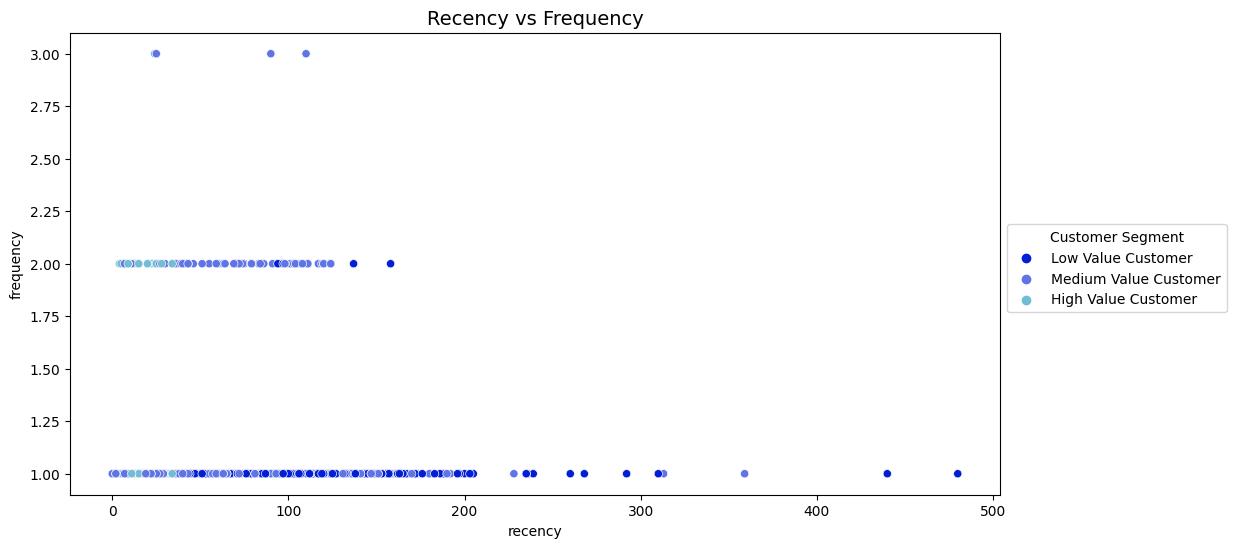

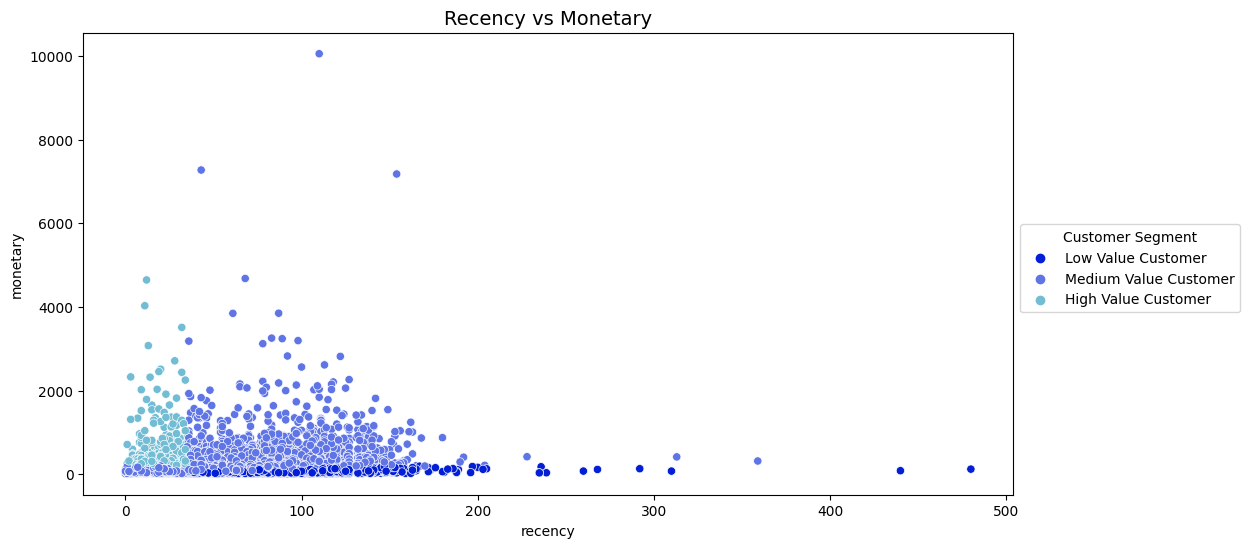

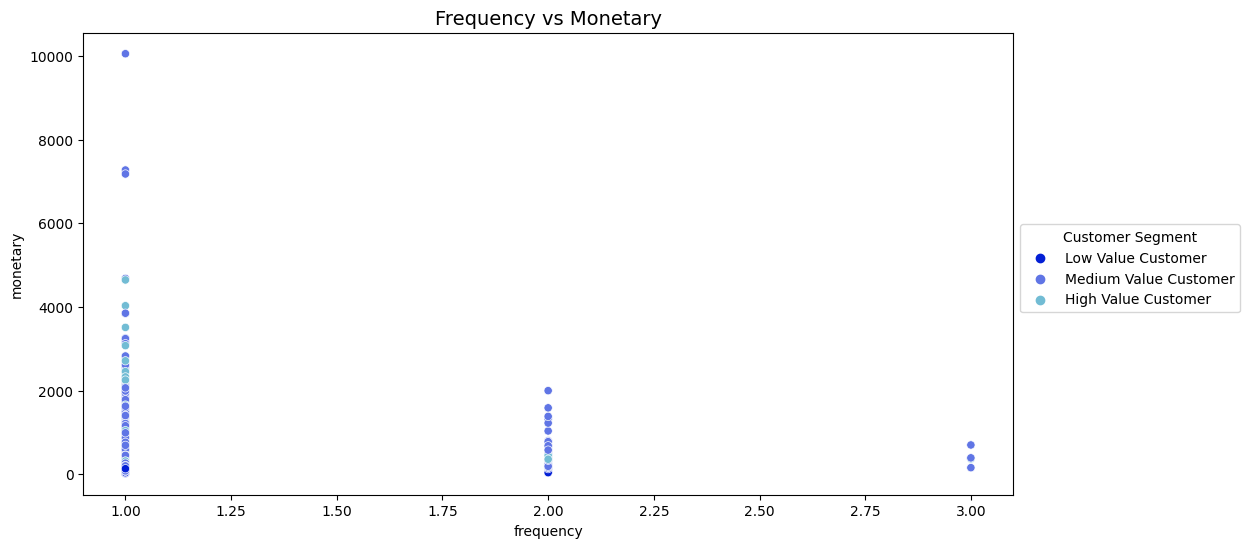

In [ ]:
# recency vs frequency
plt.figure(figsize=(12,6))
sns.scatterplot(x='recency', y='frequency', data=rfm_df, hue='cust_segment', palette=['#031fd5', '#6075e5', '#72bcd4'])
plt.title('Recency vs Frequency', fontsize=14)
plt.legend(loc='upper left', title='Customer Segment', bbox_to_anchor=(1,0.6))
plt.show()

# recency vs monetary
plt.figure(figsize=(12,6))
sns.scatterplot(x='recency', y='monetary', data=rfm_df, hue='cust_segment', palette=['#031fd5', '#6075e5', '#72bcd4'])
plt.title('Recency vs Monetary', fontsize=14)
plt.legend(loc='upper left', title='Customer Segment', bbox_to_anchor=(1,0.6))
plt.show()

# frequency vs monetary
plt.figure(figsize=(12,6))
sns.scatterplot(x='frequency', y='monetary', data=rfm_df, hue='cust_segment', palette=['#031fd5', '#6075e5', '#72bcd4'])
plt.title('Frequency vs Monetary', fontsize=14)
plt.legend(loc='upper left', title='Customer Segment', bbox_to_anchor=(1,0.6))
plt.show()

## Conclusion

Performa Seller atau Merchant berdasarkan penilaian customer secara keseluruhan?
- penjual yang response tercepat teratas membalas review customer sekitar 3 - 12 jam
- sedangkan penjual yang response terlambat hampir memerlukan waktu sekitar 900 hingga 7000 jam
- dengan kata lain penjual yang responsenya lambat hampir tidak membalas review dari customer
- sebagian besar penjual masih didominasi oleh rating 5 dan rating 4, namun penjual rating 1 diurutan ke 3

Kategori produk apa yang paling favorit dan kurang peminat?
- kategori produk dengan peminat terbanyak adalah perlengkapan tidur - mandi, kesehatan - kecantikan, perlengkapan olahraga - hiburan, aksesoris komputer dan dekorasi mebel
- kategori produk dengan peminat terendah adalah jasa keamanan, pakaian anak-anak, la cuisine, dvd / cd musik, hingga peralatan seni perkakas

Bagaimana Penilaian Customer selama berbelanja dalam beberapa bulan terakhir?
- dari banyaknya penilaian yang diberikan oleh customer
- kepuasan customer dari bulan ke bulan sepanjang 2016 hingga 2018 mengalami kenaikan dan penurunan yang fluktifatif
- diawali penurunan kepuasan awal tahun 2017, kemudian peningkatan selang tahun 2018
- pertengahan 2018 pelan-pelan mengalami penurunan, namun kembali menanjang pada sekitar mei-juni 2018

Metode pembayaran transaksi yang paling sering digunakan oleh Pelanggan?
- berdasarkan riwayat transaksi dan jumlah customer, pembayaran menggunakan kartu kredit dan boletto
- boletto merupakan alat pembayaran yang disediakan oleh pemerintah brasil
- namun tetap kartu kredit menjadi metode pembayaran yang sering digunakan
- diikuti dengan banyaknya penggunaan voucher, yang mengurangi pengeluaran yang harus dikeluarkan

Bagaimana Demografi berdasarkan Domisili dari masing-masing Pelanggan dan Penjual?
- sebagian customer berasal dari negara bagian sao paulo, rio de jainero, distrito federal, rio grande do sul
- dengan asal kota yang paling banyak berasal dari sao paulo, rio de jainero, belo horizonte, brasilia dan cuitiba

Berapa Durasi Pemesanan yang diperlukan berdasarkan Negara bagian dan Kota?
- untuk durasi pengiriman pemesanan umumnya relatif,
- hal ini berdasarkan jarak antara penjual dengan pelanggan

Kapan transaksi terakhir kali yang dilakukan pelanggan?
- 5 customer teratas melakukan transaksi sebanyak 500-300 kali
- dapat diasumsikan 10-20 customer dibawahnya melakukan transaski sekitar 300 hingga kurang dari 200 kali

Berapa kali pelanggan melakukan pembelian selama beberapa bulan terakhir?
- 5 customer teratas terakhir kali melakukan transaksi 3-2 kali
- karena jumlah transaksi yang dilakukan customer sebagian besar hanya sekali

Berapa uang yang dihasilkan pelanggan dalam beberapa bulan terakhir?   
- 5 customer teratas membelanjakan uangnya dengan rentang 10000 hingga diatas 4000
- dapat diasumsikan 10-20 customer dibawahnya melakukan transaksi sekitar 8000an hingga 2000an

Bagaimana Penilaian terhadap pelanggan berdasarkan hasil Segmentasi?
- sebagian beasr customer bernilai medium value dan low value
- customer yang high value sangat sedikit, hal ini karena masih sedikit customer yang loyal
- dapat diasumsikan sebagian customer belum atau kurang nyaman

Bagaimana Perilaku masing-masing pelanggan berdasarkan Segmentasi?
- pada frequency tidak menampilkan jumlah signifikan
- customer yang high value menampilkan recency yang paling sedikit dan monetary yang paling banyak, artinya sering belanja dan paling banyak membelanjakan uang
- sedangkan customer low value menampilkan recency yang paling banyak dan monetary yang paling sedikit, artinya tidak sering atau hampir jarang belanja dan paling sedikit membelanjakan uang